# Wstęp do uczenia maszynowego
##  Projekt nr 1
#### Jakub Piwko, Malwina Wojewoda

## sprawdzić czy usuwać te dane czy zgrupować, zobaczyć czy na modelach robi roznica

#### Pakiety

In [720]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
import warnings
import copy
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import copy

In [721]:
exec(open("functions.py").read())

### Dane i ich opis

In [722]:
census_df = pd.read_csv('census_income_dataset.csv')
census_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [723]:
pd.set_option('display.max_colwidth', -1)
descr = pd.read_csv('attributes_census_income.csv')
descr

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


#### Podział zbioru na treningowy i walidacyjny 

In [724]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
census_df_build, census_df_valid = sklearn.model_selection.train_test_split(
    census_df,
    test_size=0.30, random_state=100, stratify=census_df['income_level'])

census_df, census_df_test = sklearn.model_selection.train_test_split(
    census_df,
    test_size=0.30, random_state=100, stratify=census_df['income_level'])

In [725]:
# census_df["income_level"].value_counts()/np.shape(census_df)[0]

In [726]:
# census_df_test["income_level"].value_counts()/np.shape(census_df_test)[0]

## Ekspoloracja  i preprocessing danych

***Analiza braków danych***

In [727]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 9276 to 43599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34189 non-null  int64  
 1   workclass       34189 non-null  object 
 2   fnlwgt          34189 non-null  float64
 3   education       34189 non-null  object 
 4   education_num   34189 non-null  int64  
 5   marital_status  34189 non-null  object 
 6   occupation      34189 non-null  object 
 7   relationship    34189 non-null  object 
 8   race            34189 non-null  object 
 9   sex             34189 non-null  object 
 10  capital_gain    34189 non-null  float64
 11  capital_loss    34189 non-null  float64
 12  hours_per_week  34189 non-null  float64
 13  native_country  34189 non-null  object 
 14  income_level    34189 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 4.2+ MB


W ramce danych nie wystąpują wartości None/Null. Z opisu ramki wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach:  **?** dla danych nominalnych oraz **-100000** dla numerycznych. Sprawdźmy, ile rekordów z takimi wartościami występują w ramce.

In [728]:
census_df[census_df == -100000].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [729]:
census_df[census_df == "?"].count()

age               0   
workclass         1976
fnlwgt            0   
education         0   
education_num     0   
marital_status    0   
occupation        1984
relationship      0   
race              0   
sex               0   
capital_gain      0   
capital_loss      0   
hours_per_week    0   
native_country    630 
income_level      0   
dtype: int64

Okazuje się, że mamy braki w kolumnach `workclass`, `occupation` i `native_country`. Z czego dwie pierwsze kolumny w oczywisty sposób są powiązane, bo brak zawodu może automatycznie oznaczać brak klasy roboczej. Wartościami "?" stanowią klasę zmiennej kategorycznej i nie ma sensu tego zmieniać w inny sposób.

In [730]:
len(census_df[(census_df.occupation == "?") & (census_df.workclass == "?")]) == len(census_df[census_df.workclass == "?"]) 

True

In [731]:
len(census_df[(census_df.occupation == "?") & (census_df.workclass != "?")])

8

In [732]:
len(census_df[(census_df.occupation == "?") | (census_df.workclass == "?")])/len(census_df)*100

5.803036064231185

Widać, że, jeśli w danych jest brak w kolumnie `occupation` to nie wiadomo także nic o `workclass`. Rekordów, w których znamy `workclass` ale nie znamy `occupation` jest bardzo niewiele. Rekordy zawierające braki danych w tych 2 kolumnach stanowią jedynie 5.8% danych, więc najlepszym rozwiązaniem wydaje nam się ich usunięcie.

In [733]:
census_df.drop(census_df[(census_df.occupation == "?") | (census_df.workclass == "?")].index, inplace=True)

Jeśli chodzi o kolumnę `workclass` to braki danych zostaną zgrupowanie do kategorii w dalszej części, gdyż uznaliśmy, że to najprawdopodobniej osoby z innych państw niż Stany Zjednoczone, gdyż raczej nie ma problemów z identyfikacją obywatela państwa, w kótrym został przeprowadzony spis. 

##### Średnia, wartości minimalne itd. 
Warto sprawdzić jaka jest średnia, odchylenie standardowe, wartość minimalna, maksymalna oraz kwartyle danych w poszczególnych kolumnach.

In [734]:
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32205.000000,3.220500e+04,32205.000000,32205.000000,32205.000000,32205.000000
mean,38.550598,1.897880e+05,10.126502,1110.036175,89.566185,40.919422
std,13.210356,1.046987e+05,2.571416,7579.594977,407.690303,11.997329
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784490e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.374660e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Już dzięki temu zestawieniu możemy powiedzieć coś o danych. Można stwierdzić, że dużo osób pracuje 40 godzin tygodniowo. Porównując średnie z wartościami minimalnymi i maskymalnymi dla kolumny `capital_gain` i `capital_loss` można stwierdzić, że wartości są bardzo rozchwiane i występują obserwacje odstające. Przyjrzyjmy sie histogramom. 

***Rozkłady zmiennych***


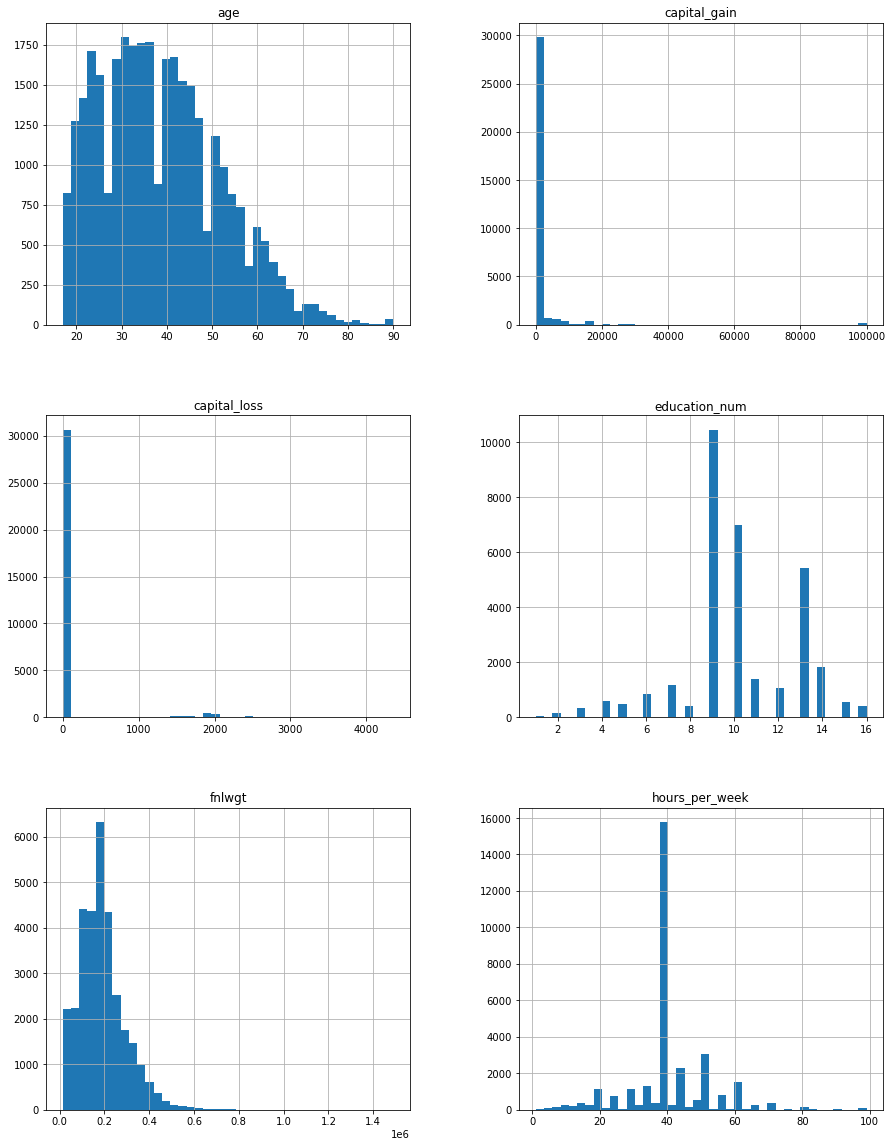

In [735]:
census_df.hist(figsize=(15, 20), bins=40)
plt.show()

Wspomniane wcześniej wnioski się potwirerdzają. Najwięcej osób pracuje 40 godzin tygodniowo, choć znajdują się osobu pracujące powyżej 80. Kolumny `capital_gain` i `capital_loss` wyglądają niekorzytsnie, gdyż mają przeważającą liczbę obserwacji zerowych. Wiek ma dosyć regularny rozkład, ale bardziej skośny prawostronnie, czyli w stronę osób młodszych. Wydaje się też, że dane zostały ucięte na wieku 90 lat. Jak wynika z opisu, kolumna `fnlwgt` jest parametrem, który ma oddawać wagę danego rekordu. Oznacza to więc, że nie będzie miała znaczenia dla oceny zarobków i można ją usunąć. Z kolei zmienna `education_num` wydaje się być zmienną kategoryczną. 

In [736]:
census_df.drop("fnlwgt", axis=1, inplace=True)

In [737]:
census_df[['education', 'education_num', 'age']].groupby(['education', 'education_num']).size().reset_index(name='counts').sort_values(by = "education_num")

,education,education_num,counts
13,Preschool,1,51
3,1st-4th,2,166
4,5th-6th,3,336
5,7th-8th,4,590
6,9th,5,494
0,10th,6,851
1,11th,7,1156
2,12th,8,413
11,HS-grad,9,10460
15,Some-college,10,6996


Z zsumowania rekordów zawierających unikalne pary `education` + `education_num` wynika, że ta druga kolumna jest tylko numerycznym zakodowaniem kolumny opisującej osiągnięty etap edukacji z zachowaniem porządku, zatem kolumna `education` nie będzie niezbędna w dalszej predykcji, dlatego możemy ją usunąć.

In [738]:
census_df.drop("education", axis=1, inplace=True)

Zamiana wartości ostatniej kolumny:
* z <=50K na 0
* z >50K na 1

ponieważ łatwiej pracuje się ze zmiennymi numerycznymi

In [739]:
census_df['income_level'] = census_df['income_level'].replace(['<=50K','>50K'],[0, 1])

##### Korelacje

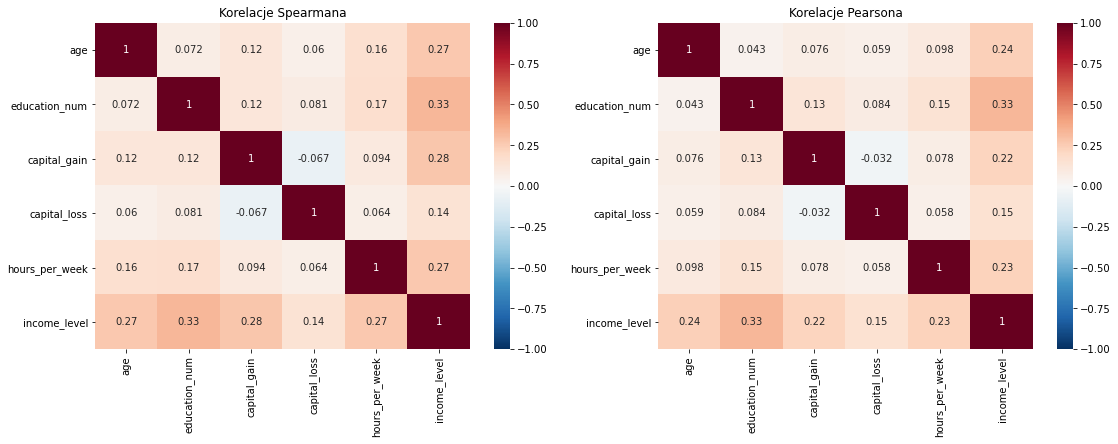

In [740]:
fig, (ax1, ax2) = plt.subplots(1,2)
census_df_cor1 = copy.deepcopy(census_df)
heatmap = sns.heatmap(census_df_cor1.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax1)
heatmap = sns.heatmap(census_df_cor1.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax2)
ax1.set_title("Korelacje Spearmana")
ax2.set_title("Korelacje Pearsona")
fig.set_size_inches(18.5, 6)
plt.show()

Interesuje nas jak zmienne korelują ze zmienną `income_level`, ponieważ właśnie ją będziemy przewidywać. Widać, że wszystkie korelują z nią dodatnio. 

Zarówno dla korelacji Spearmana, jak i Pearsona widać, że zmienne korelują ze sobą dość słabo. Najsilniejsza widać między `education_num` a `income_level`, co wskazuje na to, że ta zmienna ma największy wpływ na naszą zmienną przewidywaną. 

Z analizy korelacji Spearmana widać, że istnieje także dośc słaba korelacja liniowa między `income_level` a wiekiem, zyskiem kapitałowym oraz czasem pracy w ciągu tygodnia. 

Pozostałe zmienne korelują między sobą bardzo słabo. 

In [741]:
census_df['income_level'].value_counts()

0    24211
1    7994 
Name: income_level, dtype: int64

Dodatkowo warto wiedzieć, że znacznie mniej osób zarabia powyżej progu 50K$. Przy modelowaniu ta dysproporcja może zaburzać przewidywania, lecz wtedy się tym zajmiemy. Teraz przyjrzyjmy sie rozkładom zmiennych typowo ciągłych z uwzględnieniem poziomu zarobków.

***Wiek***

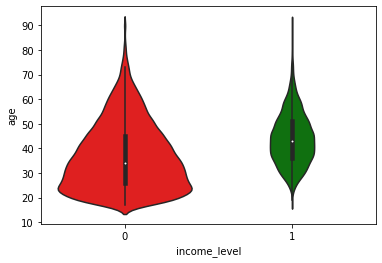

In [742]:
sns.violinplot(y = census_df['age'], x = census_df['income_level'], palette=["red", "green"], scale = "count")
plt.show()

Z rozkładu zmiennej `age` z uwzględnieniem podziału na poziom zarobków, można stwierdzić, że wśród osobów zarabiających lepiej, rozkład przesuwa się w stronę osób starszych.

Podzielmy tę zmienną na kategorie po decylach, oznaczając każdą kategorię jako numer oznaczający, w którym decylu się znalazła dana wartość.

In [743]:
res, bins = pd.qcut(census_df['age'], 10, labels=False, retbins=True)
bins.tolist()

[17.0, 22.0, 26.0, 30.0, 34.0, 37.0, 41.0, 45.0, 50.0, 57.0, 90.0]

In [744]:
tmp = pd.qcut(census_df['age'], 10, labels=False)
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: age, dtype: int64)

In [745]:
census_df['age'] = pd.qcut(census_df['age'], 10, labels=False)

***Przepracowane godziny w tygodniu***

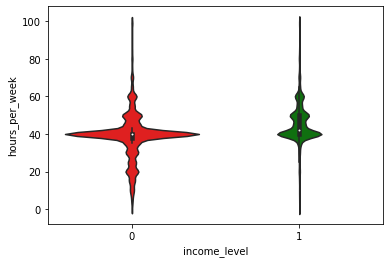

In [746]:
sns.violinplot(y = census_df['hours_per_week'], x = census_df['income_level'], palette = ['red', 'green'], scale = "count")

Dzięki zachowaniu skali ilości na wykresach można zauważyć tendecję, że osoby które pracują więcej, zarabiają lepiej. Świadczy o tym skupienie prawie wszystkich obserwacji powyżej poziomu 35h dla poziomu 1, podczas, gdy dla poziomu 0 widać duży peak w okolicach 40, ale dużą liczbę obserwacji poniżej tej wartości. Tę zmienną również możemy zmienić na kategoryczną, przy czym nie sprawdzi się tu dzielenie nawet na tercyle, ponieważ wartości w okolicahc 40 jest tak dużo. Zatem propunujemy następujący podział:
* *1* --- 0-35 godzin
* *2* --- 36-45 godzin
* *3* --- 46-inf godzin

In [747]:
tmp = pd.cut(census_df['hours_per_week'], bins=[0, 39, 42, np.inf], labels=False)
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: hours_per_week, dtype: int64)

In [748]:
census_df['hours_per_week'] = pd.cut(census_df['hours_per_week'], bins=[0, 39, 42, np.inf], labels=False)

##### Zyski i straty kapitałowe
Jako, że zmienne `capital_gain` i `capital_loss` także są typowo ciągłe, żeby uwzględnić ich rozkłady pozbędziemy się najpierw obserwacji, dla których wartości powyższych kolumn są zerowe, ponieważ wartości tych jest bardzo dużo.

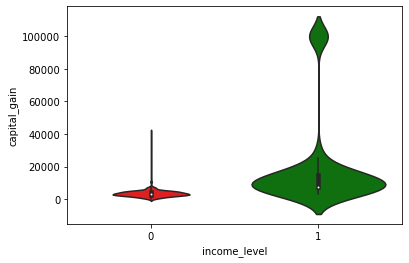

In [749]:
df = census_df[census_df['capital_gain'] > 0]
sns.violinplot(y = df['capital_gain'], x = df['income_level'], palette = ['red', 'green'], scale = "count")
plt.show()

Zobaczmy jeszcze jak to dokładniej wygląda na histogramach:

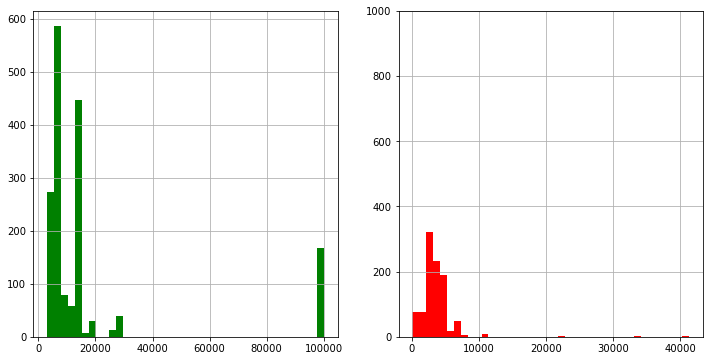

In [750]:
tmp = census_df.loc[(census_df['capital_gain']>0) & (census_df['income_level']==1)]
tmp2 = census_df.loc[(census_df['capital_gain']>0) & (census_df['income_level']==0)]

fig, axes = plt.subplots(1, 2)
tmp['capital_gain'].hist(bins = 40, figsize = (12,6), ax=axes[0], color = 'green')
tmp2['capital_gain'].hist(bins = 40, figsize = (12,6), ax=axes[1], color = 'red')
plt.ylim((0,1000))
plt.show()

Widać, że w przypadku zmiennej `capital_gain` więcej osób, które mają przychód >50 000 \\$ osiąga zysk na poziomie 0-20 000\\$. Wydaje się też, że dane zostały ucięte dla wartości powyżej 100 000\\$. Dla osób w grupie o niższych przychodach widać, że wartości zysku nie przekraczają wartości 50 000\\$, ponieważ to wlicza się do ogólnego przychodu. Aby to było możliwe ktoś musiałby usyskać dużą staratę kapitałową, ponieważ przychód liczony jest jako *capital_gain* - *capital_loss* + salary

Tę kolumnę również zmienimy na zmienną kategoryczną, przy czym zauważyliśmy, że występuje bardzo dużo zerowych wartości, więc warto je zgupować jako osobną kategorię, oznaczoną jako *0*. Pozostałe wiersze zostaną podzielone po kwintylach. 

In [751]:
tmp = census_df.loc[(census_df['capital_gain']>0)]
res, bins = pd.qcut(tmp['capital_gain'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
bins.tolist()

[114.0, 3137.0, 5013.0, 7688.0, 15024.0, 99999.0]

In [752]:
tmp = pd.cut(census_df['capital_gain'], bins=[-1, 114.0, 3103.0, 5013.0, 7688.0, 15024.0, np.inf], 
             labels=np.arange(6))
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: capital_gain, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5])

In [753]:
census_df['capital_gain'] = pd.cut(census_df['capital_gain'], bins=[-1, 114.0, 3103.0, 5013.0, 7688.0, 15024.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])

In [754]:
census_df['capital_gain'] = pd.to_numeric(census_df['capital_gain'])

`capital_loss`

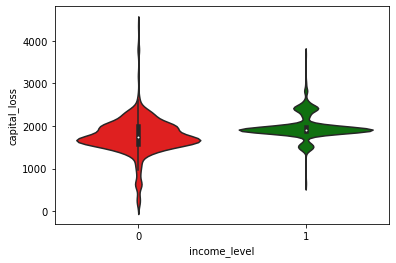

In [755]:
df = census_df[census_df['capital_loss'] > 0]
sns.violinplot(y = df['capital_loss'], x = df['income_level'], palette = ['red', 'green'], scale = "count")
plt.show()

Zobaczmy jeszcze jak to dokładniej wygląda na histogramach:

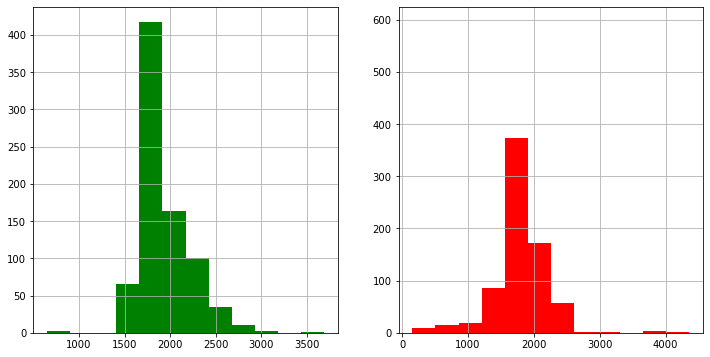

In [756]:
tmp = census_df.loc[(census_df['capital_loss']>0) & (census_df['income_level']==1)]
tmp2 = census_df.loc[(census_df['capital_loss']>0) & (census_df['income_level']==0)]

fig, axes = plt.subplots(1, 2)
tmp['capital_loss'].hist(bins = 12, figsize = (12,6), ax=axes[0], color = 'green')
tmp2['capital_loss'].hist(bins = 12, figsize = (12,6), ax=axes[1], color = 'red')
plt.ylim((0,625))
plt.show()

`capital_loss` w przypadku obu grup osób nie przekracza 5000\\$ i najwięcej osób (oprócz tych dla których odnotowano zerową wartość tej zmiennej) osiąga straty kapitałowe w okolicy 2000\\$. Rozkłady są bardzo podobne, jednak dla osób, które odnotowały mniejszy dochód bardziej przesunięte w stronę mniejszych wartości, a dla drugiej grupy w stronę większych wartości.

Tę zmienną również przekształcimy na kategoryczną, analogicznie jak `capital_gain`, czyli zerowe wartości jako osobną kategorię, oznaczoną jako *0*, a pozostałe wartości po kwintylach. 

In [757]:
tmp = census_df.loc[(census_df['capital_loss']>0)]
res, bins = pd.qcut(tmp['capital_loss'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
bins.tolist()

[155.0, 1628.0, 1887.0, 1902.0, 2002.0, 4356.0]

In [758]:
tmp = pd.cut(census_df['capital_loss'], bins=[-1, 155.0, 1619.2, 1887.0, 1902.0, 2002.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])
tmp[tmp.isna()] #sprawdzenie czy w ten sposób nie powstaną jakieś braki danych

Series([], Name: capital_loss, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5])

In [759]:
census_df['capital_loss'] = pd.cut(census_df['capital_loss'], bins=[-1, 155.0, 1619.2, 1887.0, 1902.0, 2002.0, np.inf], 
             labels=[0, 1, 2, 3, 4, 5])

In [760]:
census_df['capital_loss'] = pd.to_numeric(census_df['capital_loss'])

***Kraj pochodzenia***

Teraz przyjrzymy się zależnościom między zmiennymi kategorycznymi i zmienną poziomującą zarobki

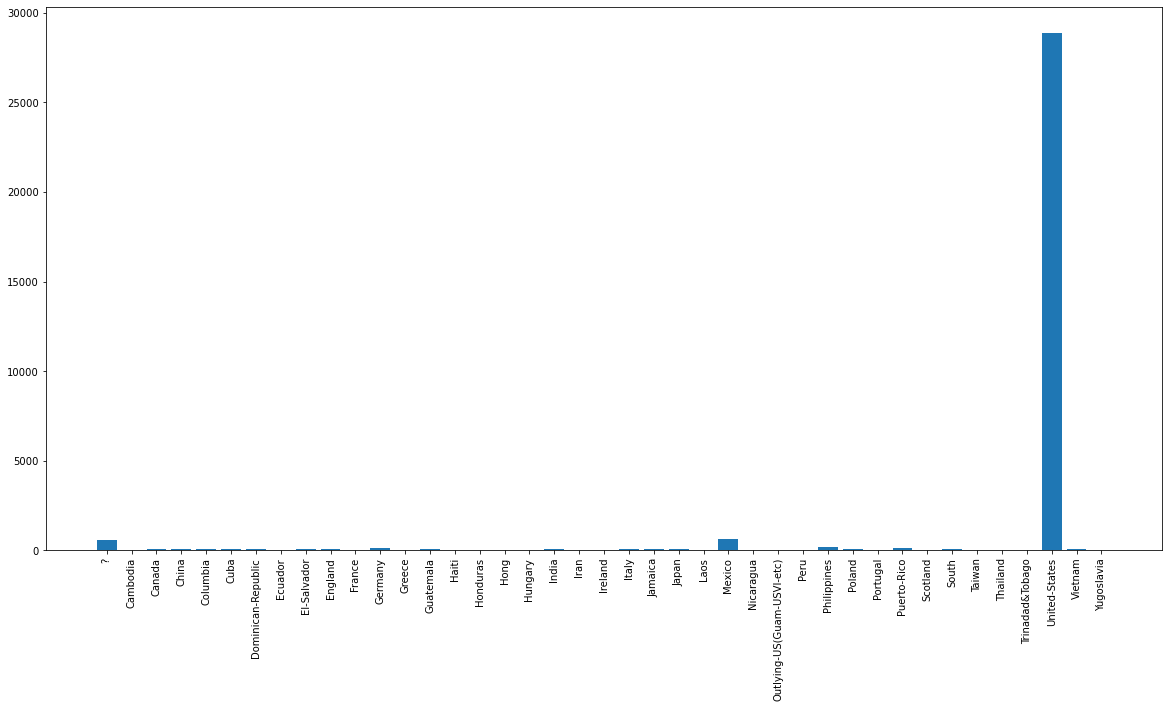

In [761]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)
df = census_df.groupby(['native_country']).size().reset_index(name='counts')
plt.bar(x="native_country", height="counts", data=df);
plt.show()

Jako że przeważająca liczba osób ze zbioru pochodzi ze Stanów Zjednoczonych, dla efektywniejszego wyciągania wniosków lepiej będzie zbadać procentowy udział osób zarabiających na danym poziomie dla każdego z krajów, z którego pochodzą emigranci.

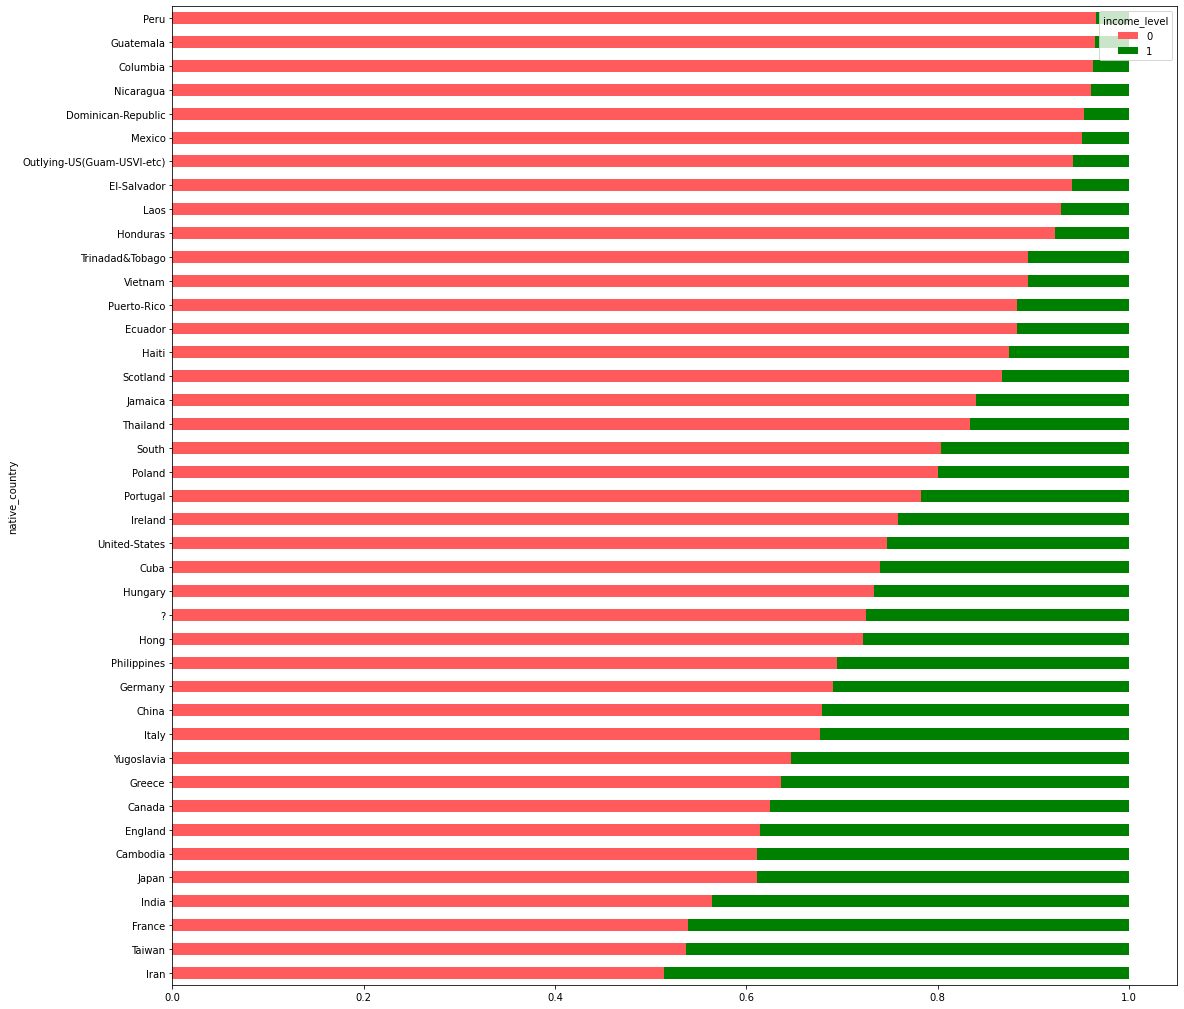

In [762]:
df = census_df.groupby('native_country')["income_level"].value_counts(normalize = True).unstack('income_level').sort_values(by = 1, ascending = False)
df.plot.barh(stacked=True, figsize = (18, 18), color = ['#ff5b5c', 'green'])
plt.show()

Widać, że wśród krajów, z których najmniejszy procent zarabia powyżej 50K to kraje Ameryki Środkowej. Po drugiej stronie przeważają z kolei kraje Europy i Azji. Można stwierdzić, że zależy to od rozwoju danych krajów. Jasne wydaje się, że dla osób pochodzących z tych bardziej rozwiniętych łatwiej jest o wyższe zarobki.

W celu zredukowania klas można by pogupować te dane w zależności od uzyskowanego dochodu, szczególnie że emigrantów jest stosunkowo mało, więc raczej nie wpłynęłoby to znacząco na dokładność predykcji, a mogłoby przyspieszyć ten proces. Spróbujmy więc zastosować taką redukcję:

In [763]:
census_df.groupby(['native_country']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False).head(10)

,native_country,counts
38,United-States,28889
25,Mexico,636
0,?,601
29,Philippines,193
11,Germany,142
32,Puerto-Rico,128
2,Canada,104
8,El-Salvador,101
18,India,101
5,Cuba,96


Widać, że jedyne bardziej wyróżniające się jednostki to *United-States* oraz *Mexico*. W takim razie wszystkie inne (w tym braki danych) możemy uznać jako *Others*. Uznaliśmy, że braki danych to najprawdopodobniej osoby z innych państw niż Stany Zjednoczone, gdyż raczej nie ma problemów z identyfikacją obywatela państwa, w kótrym został przeprowadzony spis. 

In [764]:
census_df.loc[(census_df.native_country != 'United-States') & (census_df.native_country != 'Mexico'), 'native_country'] = "Other"

***Wykształcenie***

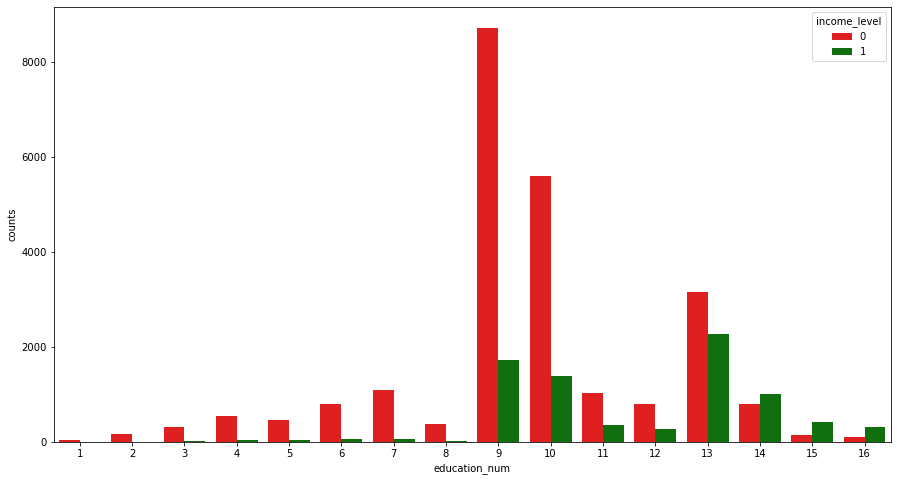

In [765]:
plt.figure(figsize=(15,8))
df = census_df.groupby(['education_num', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="education_num", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Możemy zaobserwować, że najwięcej osób z naszej próbki ma wykształcenie średnie (9 - HS-grad) lub uczęszczali na studia ale nie zdobyli stopnia naukowego (10 - some college). Dużo jest także osób ze stopniem licencjackim (13 - Bachelor). Widać wyrażnie, że im wyższy poziom w naukowej drabince, tym osób zarabiających powyżej 50K jest coraz więcej w stosunku do tych zarabiających mniej. Dla stopni powyżej magistra (od 14 - Masters) osoby oznaczone numerem 1 przeważają. 

***Stan cywilny***

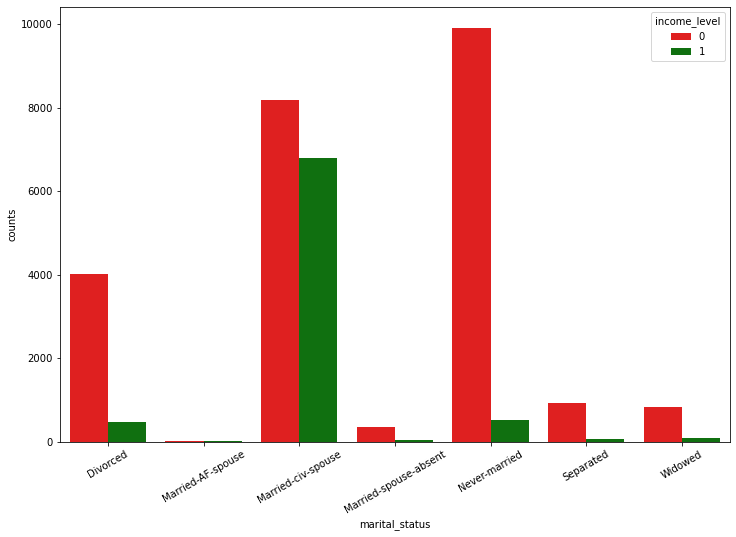

In [766]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['marital_status', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="marital_status", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.xticks(rotation = 30)
plt.show()

Największe grupy osób są w związku z małżeńskim z osobą cwyilną, ewentualnie nigdy nie zawierały takiego związku lub są rozwiedzione. Pozostałe grupy są wyraźnie mniej liczne, a najmniejszą stanowią osoby w związku małzeńskim z osobą wojskową. W każdej grupie jest przewaga osób zarabiających mniej niż 50K. Jednak grupa małzeństw z osobami cywilnymi wyróżnia się najbardziej wyrównaną proporcją osób o różnym poziomie zarobków, podczas gdy wśród pozostałych zdecydowanie więcej osób nie zarabia więcej niz 50K. Może to nasuwać wniosek, że osoby w związku małżeńskim mają większą szansę na stabilność finansową, a co za tym idzie, lepsze zarobki w ogólności.

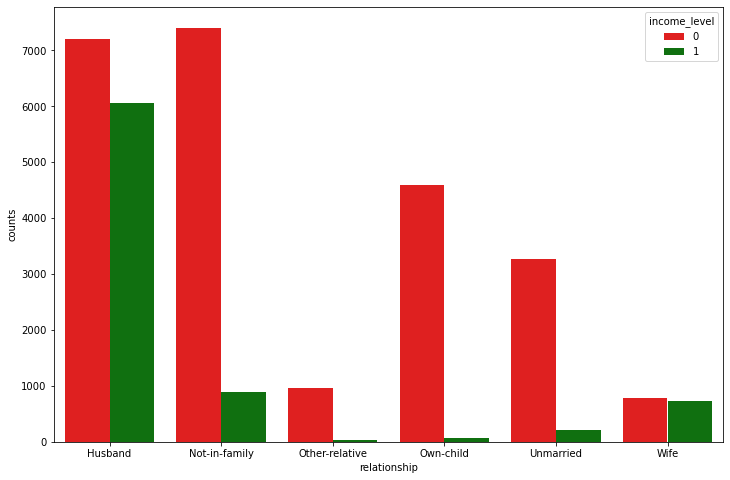

In [767]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['relationship', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="relationship", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Dosyć podobną do poprzedniej zmiennej jest zmienna `relationship`. Wnioski się nakładają, bo ponownie widać, że proporcja osób o różnych poziomach zarobków jest wyrównana dla osób w związku małżeńskim. Dla pozostałych grup zdecydowanie przeważają osoby o mniejszych zarobkach. 

***Klasa robocza i zawód***

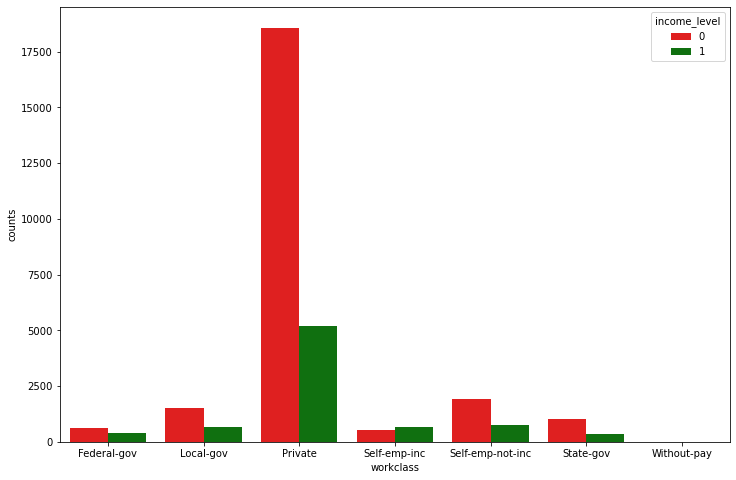

In [768]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['workclass', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="workclass", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Przewazająca część osób z próbki to osoby pracujące w sektorze prywatnym. Mimo, że jest tam również najwięcej osób, które zarabiają powyżej 50K, to proporcjonalnie zdecydowanie więcej osób zarabia więcej w sektorze samozatrudniających się.  

Ze względu na duże zróznicowanie zawodów, najpierw przyjrzymy się jak dużo osób pracuje w poszczególnych dziedzinach.

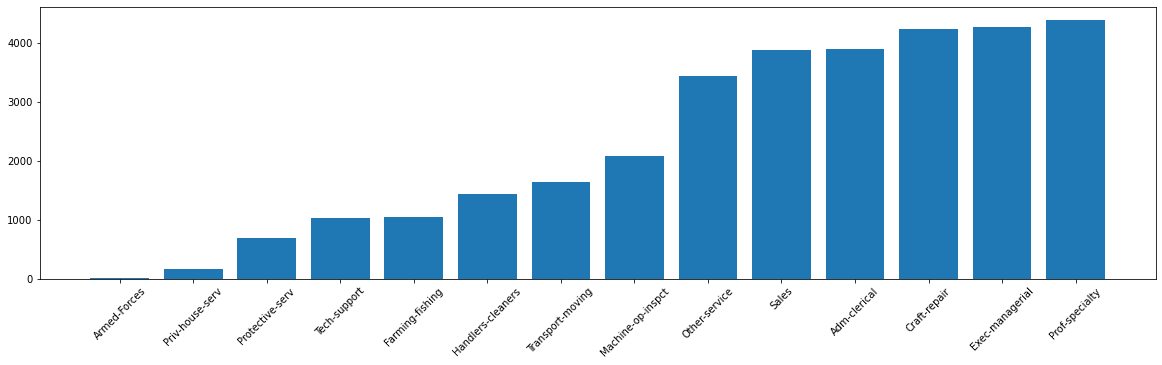

In [769]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation = 45)
df = census_df.groupby(['occupation']).size().reset_index(name='counts').sort_values(by = "counts")
plt.bar(x="occupation", height="counts", data=df);
plt.show()

Widać, że wśród osób z naszej ramki rozkład zawodów jest bardziej równowmierny. A teraz sprawdzimy jak duża część osób zarabai więcej niż 50K dla każdej grupy.

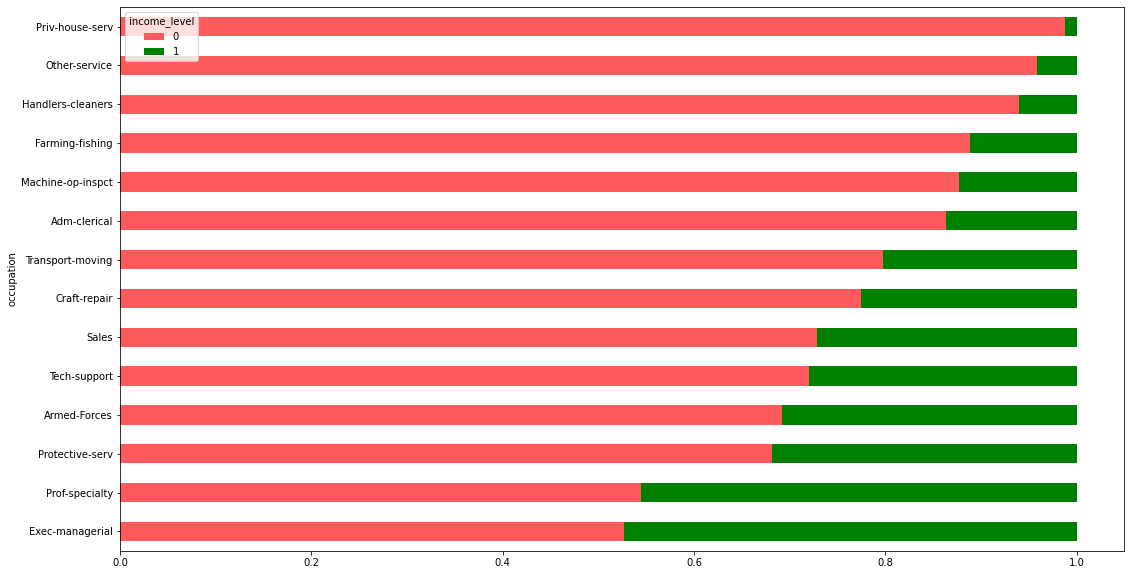

In [770]:
df = census_df.groupby('occupation')["income_level"].value_counts(normalize = True).unstack('income_level').sort_values(by = 1, ascending = False)
df.plot.barh(stacked=True, figsize = (18, 10), color = ['#ff5b5c', 'green'])
plt.show()

Dwie grupy o największym stosunku oznaczonych 1 do oznaczonych 0 to osoby o stanowiskach kierowniczych i osoby pracujące w specjalizacji. Są to także ogólnie najliczniejsze grupy pracujących, więc można uznać że praca w tych dwóch obszarach daje lepsze wynagrodzenie Nie można tego powiedzieć o osobach pracujących w zawodach odpowiedzialnych za sprzątanie i zajmowanie się domem, gdzie osób zarabaijących powyżej 50K jest bardzo mało.

***Płeć i rasa***

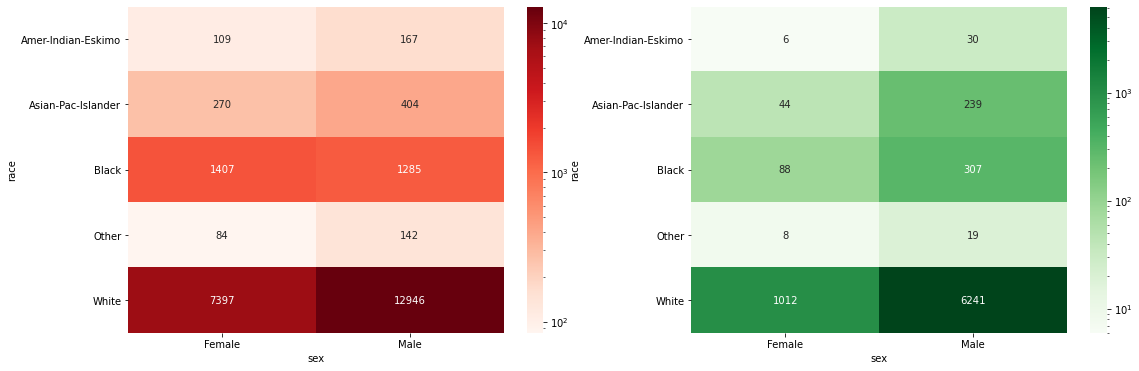

In [771]:
df1 = census_df[census_df.income_level == 0]
df1 = df1.groupby(['sex', 'race']).size().reset_index(name='counts')
df1 = pd.pivot(df1, index = 'race', columns = 'sex', values = 'counts')

df2 = census_df[census_df.income_level == 1]
df2 = df2.groupby(['sex', 'race']).size().reset_index(name='counts')
df2 = pd.pivot(df2, index = 'race', columns = 'sex', values = 'counts')

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(df1, annot=True, cmap='Reds', ax=ax1, fmt='g', norm=LogNorm())
sns.heatmap(df2, annot=True, cmap='Greens', ax=ax2, fmt='g', norm=LogNorm())
fig.set_size_inches(18.5, 6)
plt.show()

Dla lepszego zobrazowania ilości osób w poszczególnych grupach, używamy skali logarytmicznej. Wśród naszych obserwacji występuje więcej osób płci męskiej, a także przeważają osoby białe.

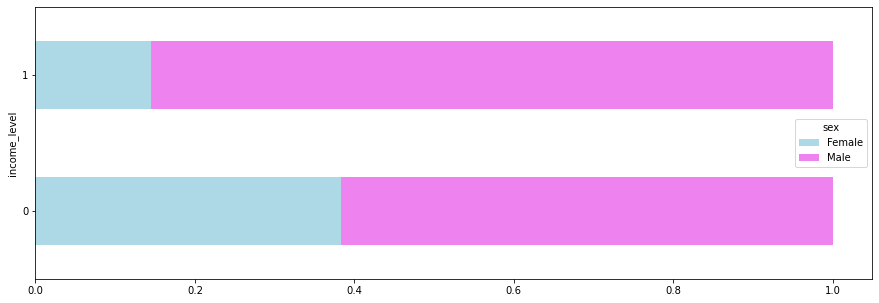

In [772]:
tmp2 = census_df
#tmp2['sex'] = tmp2['sex'].replace(['Famale','Male'],[1, 0])
tmp2 = tmp2[tmp2.race != "?"].groupby('income_level')["sex"].value_counts(normalize = True).unstack('sex')

tmp2.plot.barh(stacked=True, figsize = (15, 5), color = ['lightblue', 'violet'])
plt.show()

Można zauważyć, że w przypadku osób zarabiających poniżej 50K, stosunek kobiet do mężczyzn jest znacznie większy. Oznacza to, że kobiety częściej zarabiają mniejsze stawki. Dysproporcje można też dostrzec porównując grupy rasowe:

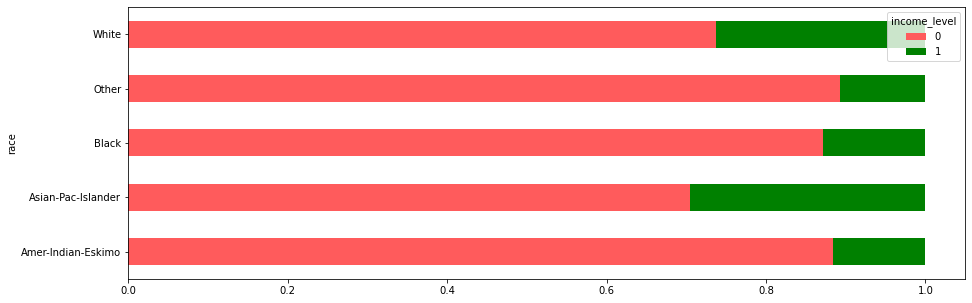

In [773]:
tmp = census_df
tmp = tmp[tmp.race != "?"].groupby('race')["income_level"].value_counts(normalize = True).unstack('income_level')

tmp.plot.barh(stacked=True, figsize = (15, 5), color = ['#ff5b5c', 'green'])
plt.show()

In [774]:
census_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
9276,7,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,United-States,0
25135,5,Private,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,4,0,United-States,1
4093,3,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,0
27463,0,Private,7,Never-married,Sales,Own-child,White,Female,0,0,0,United-States,0
7446,3,Private,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,1,United-States,0


Można zauważyć, że wśród osób Czarnoskórych oraz rdzennych Amerykanów i Inuitów występuje najmniejszy procent osób zarabiających powyżej 50K. Z kolei ludzie z Azji i wysp Pacyfiku oraz ludzie biali mają mniej drastyczną różnicę procentową i około 30% zarabia lepiej.  

### Zamiana zmiennych na numeryczne

In [775]:
country_df = pd.get_dummies(census_df['native_country'], prefix='country_')
country_df.shape

(32205, 3)

In [776]:
census_df.shape

(32205, 13)

In [777]:
# mają tyle samo wierszy więc łączenie obu ramek:
census_df = pd.concat([census_df, country_df], axis=1)
census_df.drop(['native_country'],  axis=1, inplace = True)

In [778]:
census_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
9276,7,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,0,0,0,1
25135,5,Private,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,4,0,1,0,0,1
4093,3,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,0,0,0,1
27463,0,Private,7,Never-married,Sales,Own-child,White,Female,0,0,0,0,0,0,1
7446,3,Private,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,1,0,0,0,1


In [779]:
census_df.dtypes

age                       int64 
workclass                 object
education_num             int64 
marital_status            object
occupation                object
relationship              object
race                      object
sex                       object
capital_gain              int64 
capital_loss              int64 
hours_per_week            int64 
income_level              int64 
country__Mexico           uint8 
country__Other            uint8 
country__United-States    uint8 
dtype: object

In [780]:
df_copy = copy.deepcopy(census_df)
df_copy_test = copy.deepcopy(census_df_test)

In [781]:
df_copy['workclass'].value_counts()

Private             23777
Self-emp-not-inc    2678 
Local-gov           2166 
State-gov           1398 
Self-emp-inc        1171 
Federal-gov         1003 
Without-pay         12   
Name: workclass, dtype: int64

### Label Encoding

In [782]:
df_copy.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
9276,7,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,0,0,0,1
25135,5,Private,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,4,0,1,0,0,1
4093,3,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,0,0,0,1
27463,0,Private,7,Never-married,Sales,Own-child,White,Female,0,0,0,0,0,0,1
7446,3,Private,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,1,0,0,0,1


In [783]:
def getEncoding(colname):
    le = LabelEncoder()
    le.fit_transform(df_copy[colname])
    keys = le.classes_
    values = le.transform(le.classes_)
    dictionary = dict(zip(keys, values))
    df_copy[colname] = le.fit_transform(df_copy[colname])
    return dictionary

In [784]:
dict_workclass = getEncoding('workclass')
dict_marital_status = getEncoding('marital_status')
dict_occupation = getEncoding('occupation')
dict_relationship = getEncoding('relationship')
dict_race = getEncoding('race')
dict_sex = getEncoding('sex')

In [785]:
df_copy.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
9276,7,1,14,2,9,0,4,1,0,0,2,0,0,0,1
25135,5,2,16,2,9,5,4,0,0,4,0,1,0,0,1
4093,3,1,14,2,9,0,4,1,0,0,1,0,0,0,1
27463,0,2,7,4,11,3,4,0,0,0,0,0,0,0,1
7446,3,2,9,0,3,4,4,0,0,0,1,0,0,0,1


### Wykorzystanie *Weight of Value* i *Information Value*

Teraz wyliczymy wartości WoE i Information Value dla poszczególnych zmiennych. Dzięki WoE możemy spróbować połączyć niektore wartości o podobnych wartościach tego parametru. Analizując I.V. możemy także dowiedzieć się, które zmienne są dobrymi predykatorami, jako że im większa suma IV, tym zmienna może okazać się lepszym predykatorem. Skorzystamy z poniższej napisanej przez nas funckji `woefun`.

In [786]:
total_neg = census_df['income_level'].value_counts()[0]
total_pos = census_df['income_level'].value_counts()[1]
def woefun(colname):
    #Wylicza WoE i IV
    df = census_df.groupby(['income_level', colname]).size().reset_index(name='counts')
    df = pd.pivot(df, index = colname, columns = 'income_level', values = 'counts')
    neg = df[0]/total_neg
    pos = df[1]/total_pos
    df['WoE'] = np.log(pos/neg)
    df['IV'] = (pos - neg)*df['WoE']
    df.loc['Total'] = df[['IV']].sum()
    return df

def woevalues(colname):
    #Oblicza WoE i zwraca w postaci obiektu series pary kolumna : WoE, aby ułatwić zamianę zmiennych w zbiorze testowym
    df = woefun(colname)
    df = df['WoE']
    df = df.drop('Total')
    return df

def woechange(colname, df, data):
    #Zmienia wartości 1,2... na WoE w zbiorze data, który podajemy jako argument
    for i in range(1, len(df) + 1):
        data[colname] = data[colname].replace(i , df[i])
    

In [787]:
column_woe = {} #słownik, w którym zapamiętuję woe dla kolejnych kolumn, żeby łatwiej wykorzystać przy transfomacji zbioru testowego

____________

In [788]:
df = woefun('workclass')
df.sort_values('WoE')

income_level,0,1,WoE,IV
workclass,,,,
Without-pay,11.0,1.0,-1.289779,0.000425
Private,18582.0,5195.0,-0.166381,0.019573
State-gov,1026.0,372.0,0.093587,0.000389
Self-emp-not-inc,1923.0,755.0,0.173192,0.002601
Local-gov,1519.0,647.0,0.254655,0.004634
Federal-gov,623.0,380.0,0.613741,0.013382
Self-emp-inc,527.0,644.0,1.308614,0.076938
Total,NaN,NaN,NaN,0.117941


Widać po wartości IV, że zmienna `workclass` będzie umiarkowanie wpływać na predykcyjność. Pogrupujemy wartości przyjmowane przez tę zmienną na kategorie według podobieństwa WoE.

In [789]:
census_df['workclass'] = census_df['workclass'].replace(['Without-pay', 'Never-worked', '?'] , 1)
census_df['workclass'] = census_df['workclass'].replace(['Private'] , 2)
census_df['workclass'] = census_df['workclass'].replace(['Self-emp-not-inc', 'State-gov', 'Local-gov'] , 3)
census_df['workclass'] = census_df['workclass'].replace(['Federal-gov'] , 4)
census_df['workclass'] = census_df['workclass'].replace(['Self-emp-inc'] , 5)

In [790]:
df = woefun('workclass')
df

income_level,0,1,WoE,IV
workclass,,,,
1,11.0,1.0,-1.289779,0.000425
2,18582.0,5195.0,-0.166381,0.019573
3,4468.0,1774.0,0.184412,0.006892
4,623.0,380.0,0.613741,0.013382
5,527.0,644.0,1.308614,0.076938
Total,NaN,NaN,NaN,0.117209


In [791]:
woe_workclass = woevalues('workclass')
column_woe['workclass'] = woe_workclass
woechange('workclass', woe_workclass, census_df)

***

In [792]:
df = woefun('occupation')
df.sort_values('WoE')

income_level,0,1,WoE,IV
occupation,,,,
Priv-house-serv,170.0,2.0,-3.334535,0.022580
Other-service,3301.0,141.0,-2.045105,0.242764
Handlers-cleaners,1352.0,87.0,-1.635316,0.073523
Farming-fishing,934.0,117.0,-0.969187,0.023204
Machine-op-inspct,1828.0,257.0,-0.853786,0.037015
Adm-clerical,3364.0,533.0,-0.734249,0.053064
Transport-moving,1311.0,332.0,-0.265295,0.003347
Craft-repair,3283.0,954.0,-0.127733,0.002077
Sales,2816.0,1050.0,0.121589,0.001828


In [793]:
census_df['occupation'] = census_df['occupation'].replace(['Priv-house-serv'] , 1)
census_df['occupation'] = census_df['occupation'].replace(['Other-service', 'Handlers-cleaners' ] , 2)
census_df['occupation'] = census_df['occupation'].replace(['?', 'Adm-clerical','Machine-op-inspct', 'Farming-fishing'] , 3)
census_df['occupation'] = census_df['occupation'].replace(['Transport-moving', 'Craft-repair'] , 4)
census_df['occupation'] = census_df['occupation'].replace(['Sales', 'Tech-support'] , 5)
census_df['occupation'] = census_df['occupation'].replace(['Protective-serv', 'Armed-Forces'] , 6)
census_df['occupation'] = census_df['occupation'].replace(['Prof-specialty', 'Exec-managerial'] , 7)

In [794]:
df = woefun('occupation')
df

income_level,0,1,WoE,IV
occupation,,,,
1,170.0,2.0,-3.334535,0.022580
2,4653.0,228.0,-1.907806,0.312239
3,6126.0,907.0,-0.802039,0.111937
4,4594.0,1286.0,-0.165099,0.004768
5,3560.0,1339.0,0.130278,0.002665
6,475.0,222.0,0.347478,0.002833
7,4633.0,4010.0,0.963702,0.299005
Total,NaN,NaN,NaN,0.756026


In [795]:
woe_occupation = woevalues('occupation')
column_woe['occupation'] = woe_occupation
woechange('occupation', woe_occupation, census_df)

***

In [796]:
df = woefun('relationship')
df.sort_values('WoE')

income_level,0,1,WoE,IV
relationship,,,,
Own-child,4584.0,75.0,-3.004723,0.540710
Other-relative,966.0,33.0,-2.268540,0.081148
Unmarried,3266.0,218.0,-1.598710,0.172064
Not-in-family,7407.0,894.0,-1.006359,0.195336
Husband,7201.0,6051.0,0.934119,0.429243
Wife,787.0,723.0,1.023297,0.059287
Total,NaN,NaN,NaN,1.477788


Wydaje się, że wartość IV jest podejrzanie wysoka, być może zmienna `relationship` jest mocnym predykatorem. Dokonujemy analogicznego podziału.

In [797]:
census_df['relationship'] = census_df['relationship'].replace(['Own-child'] , 1)
census_df['relationship'] = census_df['relationship'].replace(['Other-relative'] , 2)
census_df['relationship'] = census_df['relationship'].replace(['Unmarried'] , 3)
census_df['relationship'] = census_df['relationship'].replace(['Not-in-family'] , 4)
census_df['relationship'] = census_df['relationship'].replace(['Wife', 'Husband'] , 5)

In [798]:
df = woefun('relationship')
df

income_level,0,1,WoE,IV
relationship,,,,
1,4584.0,75.0,-3.004723,0.540710
2,966.0,33.0,-2.268540,0.081148
3,3266.0,218.0,-1.598710,0.172064
4,7407.0,894.0,-1.006359,0.195336
5,7988.0,6774.0,0.943267,0.488096
Total,NaN,NaN,NaN,1.477355


In [799]:
woe_relationship = woevalues('relationship')
column_woe['relationship'] = woe_relationship
woechange('relationship', woe_relationship, census_df)

***

In [800]:
df = woefun('marital_status')
df.sort_values('WoE')

income_level,0,1,WoE,IV
marital_status,,,,
Never-married,9910.0,515.0,-1.849017,0.637716
Separated,929.0,71.0,-1.463313,0.043152
Widowed,826.0,90.0,-1.108669,0.025342
Married-spouse-absent,347.0,38.0,-1.103623,0.010571
Divorced,4015.0,469.0,-1.039074,0.111352
Married-AF-spouse,12.0,9.0,0.820434,0.000517
Married-civ-spouse,8172.0,6802.0,0.924619,0.474658
Total,NaN,NaN,NaN,1.303309


Analizując IV, możemy spodziewać się, że zmienna `marital_status` będzie silnym predykatorem. Mając na uwadzę wcześniejszą analizę i wartości WoE, podzielimy tę zmienną.

In [801]:
census_df['marital_status'] = census_df['marital_status'].replace(['Never-married', 'Separated'] , 1)
census_df['marital_status'] = census_df['marital_status'].replace(['Widowed', 'Married-spouse-absent', 'Divorced'] , 2)
census_df['marital_status'] = census_df['marital_status'].replace(['Married-AF-spouse', 'Married-civ-spouse'] , 3)

In [802]:
df = woefun('marital_status')
df

income_level,0,1,WoE,IV
marital_status,,,,
1,10839.0,586.0,-1.809470,0.677437
2,5188.0,597.0,-1.054071,0.147150
3,8184.0,6811.0,0.924474,0.475166
Total,NaN,NaN,NaN,1.299753


In [803]:
woe_marital_status = woevalues('marital_status')
woechange('marital_status', woe_marital_status, census_df)

***

In [804]:
df = woefun('race')
df.sort_values('WoE')

income_level,0,1,WoE,IV
race,,,,
Other,226.0,27.0,-1.016582,0.006056
Amer-Indian-Eskimo,276.0,36.0,-0.928766,0.006405
Black,2692.0,395.0,-0.811038,0.050104
White,20343.0,7253.0,0.076794,0.005150
Asian-Pac-Islander,674.0,283.0,0.240333,0.001818
Total,NaN,NaN,NaN,0.069533


Patrząc na wartości IV, zmienna `race` raczej jest słabym predykatorem. Patrząc na wartośći WoE oraz mając na uwadzę naszą wcześniejszą analizę zmiennej, wydaje się że można podzielić wartości na dwie kategorie.

In [805]:
census_df['race'] = census_df['race'].replace(['Other', 'Amer-Indian-Eskimo', 'Black'] , 1)
census_df['race'] = census_df['race'].replace(['White', 'Asian-Pac-Islander'] , 2)

In [806]:
df = woefun('race')
df

income_level,0,1,WoE,IV
race,,,,
1,3194.0,458.0,-0.834044,0.062245
2,21017.0,7536.0,0.082476,0.006155
Total,NaN,NaN,NaN,0.068400


In [807]:
woe_race = woevalues('race')
column_woe['race'] = woe_race
woechange('race', woe_race, census_df)

***

In [808]:
df = woefun('education_num')
df.sort_values('WoE')

income_level,0,1,WoE,IV
education_num,,,,
1,50.0,1.0,-2.803907,0.005440
2,160.0,6.0,-2.175299,0.012743
7,1095.0,61.0,-1.779520,0.066904
3,318.0,18.0,-1.763564,0.019193
6,799.0,52.0,-1.624001,0.043031
5,463.0,31.0,-1.595624,0.024326
8,386.0,27.0,-1.551885,0.019500
4,551.0,39.0,-1.540057,0.027536
9,8729.0,1731.0,-0.509836,0.073417


Patrząc na ułożenie odpowiednich wartości zmiennej `education_num` po posegregowaniu według wartości WoE, można stwierdzić, że poziom edukacji ma znaczenie, co zauważyliśmy już wcześniej. Pogrupujmy zmienną. 

In [809]:
census_df['education_num'] = census_df['education_num'].replace([3,4,5,6,7,8] , 3)
census_df['education_num'] = census_df['education_num'].replace([9, 10] , 4)
census_df['education_num'] = census_df['education_num'].replace([11, 12] , 5)
census_df['education_num'] = census_df['education_num'].replace([13] , 6)
census_df['education_num'] = census_df['education_num'].replace([14] , 7)
census_df['education_num'] = census_df['education_num'].replace([15, 16] , 8)

In [810]:
df = woefun('education_num')
df

income_level,0,1,WoE,IV
education_num,,,,
1,50.0,1.0,-2.803907,0.005440
2,160.0,6.0,-2.175299,0.012743
3,3612.0,228.0,-1.654555,0.199650
4,14343.0,3113.0,-0.419559,0.085170
5,1834.0,639.0,0.053766,0.000225
6,3159.0,2266.0,0.775876,0.118697
7,801.0,1019.0,1.348832,0.127311
8,252.0,722.0,2.160712,0.172661
Total,NaN,NaN,NaN,0.721898


In [811]:
woe_education_num = woevalues('education_num')
column_woe['education_num'] = woe_education_num
woechange('education_num', woe_education_num, census_df)

***

In [812]:
df = woefun('age')
df.sort_values('WoE')

income_level,0,1,WoE,IV
age,,,,
0,3499.0,14.0,-4.413059,0.630051
1,3116.0,157.0,-1.879944,0.205031
2,2833.0,517.0,-0.592933,0.031034
3,2711.0,845.0,-0.057620,0.000361
9,2169.0,864.0,0.187667,0.003471
4,1864.0,791.0,0.250934,0.005510
5,2232.0,1170.0,0.462222,0.025039
6,1908.0,1153.0,0.604427,0.039545
8,1940.0,1178.0,0.609246,0.040961


In [813]:
census_df['age'] = census_df['age'].replace([6,7,8,9] , 6)
census_df['age'] = census_df['age'].replace([4, 10, 5] , 5)
census_df['age'] = census_df['age'].replace([3], 4)
census_df['age'] = census_df['age'].replace([2], 3)
census_df['age'] = census_df['age'].replace([1], 2)
census_df['age'] = census_df['age'].replace([0], 1)

In [814]:
df = woefun('age')
df

income_level,0,1,WoE,IV
age,,,,
1,3499.0,14.0,-4.413059,0.630051
2,3116.0,157.0,-1.879944,0.205031
3,2833.0,517.0,-0.592933,0.031034
4,2711.0,845.0,-0.057620,0.000361
5,4096.0,1961.0,0.371559,0.028287
6,7956.0,4500.0,0.538267,0.126122
Total,NaN,NaN,NaN,1.020886


In [815]:
woe_age = woevalues('age')
column_woe['age'] = woe_age
woechange('age', woe_age, census_df)

***

In [816]:
df = woefun('hours_per_week')
df.sort_values('WoE')

income_level,0,1,WoE,IV
hours_per_week,,,,
0,6475.0,696.0,-1.122238,0.202424
1,12103.0,3379.0,-0.167758,0.012952
2,5633.0,3919.0,0.745310,0.191977
Total,NaN,NaN,NaN,0.407352


In [817]:
census_df['hours_per_week'] = census_df['hours_per_week'].replace([2], 3)
census_df['hours_per_week'] = census_df['hours_per_week'].replace([1], 2)
census_df['hours_per_week'] = census_df['hours_per_week'].replace([0], 1)

Zmienna `hours_per_week` nie wymaga dalszej kateogryzacji. 

In [818]:
woe_hours_per_week = woevalues('hours_per_week')
column_woe['hours_per_week'] = woe_hours_per_week
woechange('hours_per_week', woe_hours_per_week, census_df)

***

In [819]:
df = woefun('capital_loss')
df.sort_values('WoE')

income_level,0,1,WoE,IV
capital_loss,,,,
1,231.0,68.0,-0.114794,0.000119
0,23472.0,7195.0,-0.074306,0.005159
2,259.0,212.0,0.907874,0.014365
5,140.0,150.0,1.177109,0.015281
4,97.0,165.0,1.639350,0.027269
3,12.0,204.0,3.941329,0.098626
Total,NaN,NaN,NaN,0.160818


Analizując IV wydaje się, że`capital_loss` ma średni wpływ na predykcyjność.

In [820]:
census_df['capital_loss'] = census_df['capital_loss'].replace([0], 1)
census_df['capital_loss'] = census_df['capital_loss'].replace([2, 5], 2)
census_df['capital_loss'] = census_df['capital_loss'].replace([3], 5)
census_df['capital_loss'] = census_df['capital_loss'].replace([4], 3)
census_df['capital_loss'] = census_df['capital_loss'].replace([5], 4)

In [821]:
df = woefun('capital_loss')
df

income_level,0,1,WoE,IV
capital_loss,,,,
1,23703.0,7263.0,-0.074693,0.005263
2,399.0,362.0,1.010799,0.029115
3,97.0,165.0,1.639350,0.027269
4,12.0,204.0,3.941329,0.098626
Total,NaN,NaN,NaN,0.160273


In [822]:
woe_capital_loss = woevalues('capital_loss')
column_woe['capital_loss'] = woe_capital_loss
woechange('capital_loss', woe_capital_loss, census_df)

***

In [823]:
df = woefun('capital_gain')
df.sort_values('WoE')

income_level,0,1,WoE,IV
capital_gain,,,,
1,432.0,86.0,-0.505962,0.003585
2,455.0,91.0,-0.501322,0.003715
0,23242.0,6296.0,-0.197931,0.034121
3,68.0,679.0,3.409229,0.280000
4,10.0,586.0,5.178851,0.377496
5,4.0,256.0,5.266999,0.167800
Total,NaN,NaN,NaN,0.866717


Analigocznie jak wcześniej dzielimy na kategorie po WoE.

In [824]:
census_df['capital_gain'] = census_df['capital_gain'].replace([2], 1)
census_df['capital_gain'] = census_df['capital_gain'].replace([0], 2)
census_df['capital_gain'] = census_df['capital_gain'].replace([4,5], 4)

In [825]:
df = woefun('capital_gain')
df

income_level,0,1,WoE,IV
capital_gain,,,,
1,887.0,177.0,-0.503579,0.007299
2,23242.0,6296.0,-0.197931,0.034121
3,68.0,679.0,3.409229,0.280000
4,14.0,842.0,5.204838,0.545211
Total,NaN,NaN,NaN,0.866631


In [826]:
woe_capital_gain = woevalues('capital_gain')
column_woe['capital_gain'] = woe_capital_gain
woechange('capital_gain', woe_capital_gain, census_df)

***

In [827]:
df = woefun('sex')
df.sort_values('WoE')

income_level,0,1,WoE,IV
sex,,,,
Female,9267.0,1158.0,-0.971650,0.231157
Male,14944.0,6836.0,0.326009,0.077558
Total,NaN,NaN,NaN,0.308715


Zmienną dotyczącą płci też zmienimy z względu na WoE.

In [828]:
census_df['sex'] = census_df['sex'].replace(['Female'], 1)
census_df['sex'] = census_df['sex'].replace(['Male'], 2)

In [829]:
woe_sex = woevalues('sex')
column_woe['sex'] = woe_sex
woechange('sex', woe_sex, census_df)

In [830]:
census_df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
9276,0.538267,0.184412,1.348832,0.924474,0.963702,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,0,1
25135,0.371559,-0.166381,2.160712,0.924474,0.963702,0.943267,0.082476,-0.971650,-0.197931,1.639350,-1.122238,1,0,0,1
4093,-0.057620,0.184412,1.348832,0.924474,0.963702,0.943267,0.082476,0.326009,-0.197931,-0.074693,-0.167758,0,0,0,1
27463,-4.413059,-0.166381,-1.654555,-1.809470,0.130278,-3.004723,0.082476,-0.971650,-0.197931,-0.074693,-1.122238,0,0,0,1
7446,-0.057620,-0.166381,-0.419559,-1.054071,0.963702,-1.598710,0.082476,-0.971650,-0.197931,-0.074693,-0.167758,0,0,0,1
37956,-0.592933,0.184412,0.775876,-1.809470,0.963702,-1.006359,-0.834044,-0.971650,-0.197931,-0.074693,0.745310,0,0,0,1
34808,0.538267,1.308614,2.160712,0.924474,0.963702,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,0,1
16664,-0.592933,0.184412,-0.419559,-1.809470,-0.165099,-3.004723,0.082476,0.326009,-0.197931,-0.074693,-0.167758,0,0,0,1
36841,-0.057620,-0.166381,-0.419559,0.924474,-0.802039,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,0,1
8642,0.538267,-0.166381,-0.419559,0.924474,0.130278,0.943267,0.082476,0.326009,-0.197931,-0.074693,-0.167758,0,0,0,1


## Porównanie wykresów korelacji przed i po obróce danych

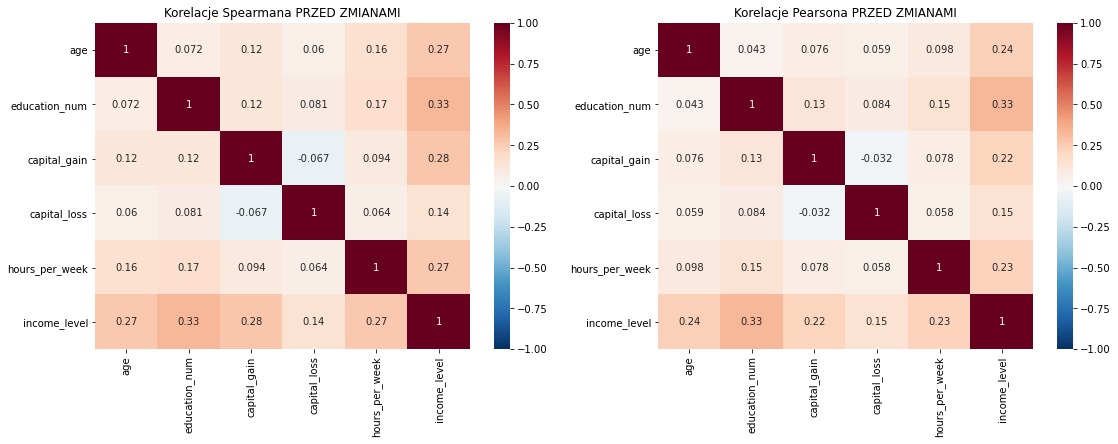

In [831]:
#PRZED ZMIANAMI
fig, (ax1, ax2) = plt.subplots(1,2)
heatmap = sns.heatmap(census_df_cor1.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax1)
heatmap = sns.heatmap(census_df_cor1.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax2)
ax1.set_title("Korelacje Spearmana PRZED ZMIANAMI")
ax2.set_title("Korelacje Pearsona PRZED ZMIANAMI")
fig.set_size_inches(18.5, 6)
plt.show()

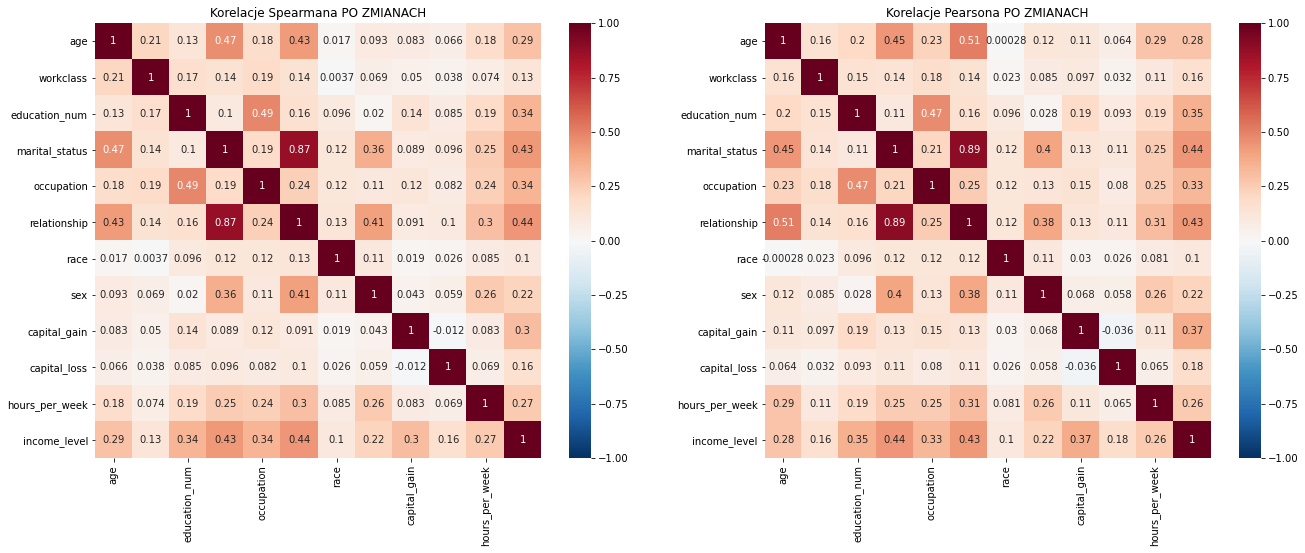

In [832]:
fig, (ax1, ax2) = plt.subplots(1,2)
census_df_cor2=census_df.loc[:, ~census_df.columns.isin(["country__Mexico", 'country__Other', 'country__United-States'])]
heatmap = sns.heatmap(census_df_cor2.corr(method = 'spearman'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax1)
heatmap = sns.heatmap(census_df_cor2.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap="RdBu_r", ax=ax2)
ax1.set_title("Korelacje Spearmana PO ZMIANACH")
ax2.set_title("Korelacje Pearsona PO ZMIANACH")
fig.set_size_inches(22, 8)
plt.show()

Analizujemy tylko korelacje ze zmienną celu: `income_level`. Widać, że zmienne korelują ze zmienną celu na poziomie 0.1 - 0.44 dla korelacji Spearmana i prawie identycznym zakresie w przypadku korelacji Pearsona, co wskazuje an to że prawdopodobnie większość zależności między danymi jest liniowa. Możemy także zauważyć, że zmienne, `relationship` i `marital_status` są od siebie wyraźnie zależne liniowo. Porównując z wykresem korelacji, który był wykonany przed obróbką danych widać, że korelacje ze zmienną celu wzrosły zarówno dla Sprearmana, jak i Pearsona (jeśli patrzymy tylko na kolumny, które były wcześneij także numeryczne).

Warto spojrzeć jeszcze na zmienne pod kątem ich siły predykcji zmiennej celu. Zbadamy wskaźnik gini.

In [833]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [834]:
y_train = census_df['income_level']
census_df.drop('income_level', inplace = True, axis = 1)

In [835]:
lr = LogisticRegression(max_iter=1000)

In [836]:
lr.fit(census_df[['marital_status']], y_train)

LogisticRegression(max_iter=1000)

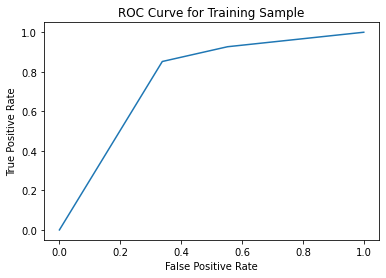

gini_test: 0.5317


In [837]:
gini_pred(lr, census_df[['marital_status']], y_train)

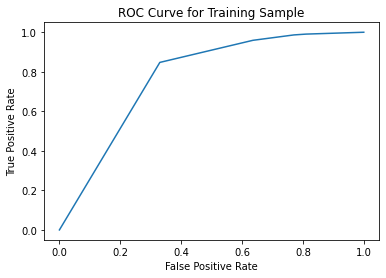

gini_test: 0.5505


In [838]:
lr.fit(census_df[['relationship']], y_train)
gini_pred(lr, census_df[['relationship']], y_train)

Po zbadaniu gini wyłącznie dla marital_status i relationship dla regresji logistycznej, możemy stwierdzić, że uzyskany score jest lepszy dla tej drugiej zmiennej. Podobnie wnioski można wyciągnąć ze zbadania Information value, gdyż także ta wartość jest wyższa dla zmiennej relationship. Jako, że obie wysoko korelują ze sobą, można usunąć zmienną marital_status.

In [839]:
census_df.drop('marital_status', inplace = True, axis = 1)

#### Transformacja zbioru testowego

In [840]:
census_df_test = TestTransform(census_df_test)
census_df_test = WoETransform(census_df_test, column_woe)

In [841]:
y_test = census_df_test['income_level']
census_df_test.drop('income_level', inplace = True, axis = 1)

In [842]:
census_df_test.head(5)

,age,workclass,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country__Mexico,country__Other,country__United-States
47569,0.371559,0.184412,0.775876,-0.165099,0.943267,0.082476,0.326009,-0.197931,-0.074693,-1.122238,0,0,1
16929,-1.879944,-0.166381,-0.419559,-0.165099,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,1
28824,0.371559,-0.166381,-0.419559,0.130278,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,1
7361,0.371559,-0.166381,-1.654555,-1.907806,0.943267,0.082476,-0.971650,-0.197931,-0.074693,-1.122238,0,0,1
31059,0.538267,-0.166381,-0.419559,-0.165099,0.943267,0.082476,0.326009,-0.197931,-0.074693,-0.167758,0,0,1


In [843]:
census_df.head(5)

,age,workclass,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country__Mexico,country__Other,country__United-States
9276,0.538267,0.184412,1.348832,0.963702,0.943267,0.082476,0.326009,-0.197931,-0.074693,0.745310,0,0,1
25135,0.371559,-0.166381,2.160712,0.963702,0.943267,0.082476,-0.971650,-0.197931,1.639350,-1.122238,0,0,1
4093,-0.057620,0.184412,1.348832,0.963702,0.943267,0.082476,0.326009,-0.197931,-0.074693,-0.167758,0,0,1
27463,-4.413059,-0.166381,-1.654555,0.130278,-3.004723,0.082476,-0.971650,-0.197931,-0.074693,-1.122238,0,0,1
7446,-0.057620,-0.166381,-0.419559,0.963702,-1.598710,0.082476,-0.971650,-0.197931,-0.074693,-0.167758,0,0,1


In [844]:
### Preprocessing z label encoder

df_copy_test = TestTransform(df_copy_test)

In [845]:
df_copy_test

,age,workclass,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
47569,4,Self-emp-not-inc,13,Craft-repair,Husband,White,Male,0,0,0,0,0,0,1
16929,1,Private,9,Craft-repair,Husband,White,Male,0,0,2,0,0,0,1
28824,5,Private,10,Sales,Husband,White,Male,0,0,2,1,0,0,1
7361,5,Private,8,Other-service,Wife,White,Female,0,0,0,0,0,0,1
31059,7,Private,10,Craft-repair,Husband,White,Male,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48614,2,Private,5,Other-service,Other-relative,White,Female,0,0,0,0,0,0,1
5994,5,Private,9,Machine-op-inspct,Husband,White,Male,0,0,1,0,0,0,1
14123,5,?,3,?,Husband,White,Male,0,0,1,0,1,0,0
11530,2,Self-emp-inc,13,Exec-managerial,Husband,White,Male,0,2,1,1,0,0,1


In [846]:
df_copy_test = LabelEncodingTest(df_copy_test)
df_copy_test.dropna(inplace = True)

In [847]:
df_copy_test.head()

,age,workclass,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_level,country__Mexico,country__Other,country__United-States
47569,4,4.0,13,2.0,0,4,1,0,0,0,0,0,0,1
16929,1,2.0,9,2.0,0,4,1,0,0,2,0,0,0,1
28824,5,2.0,10,11.0,0,4,1,0,0,2,1,0,0,1
7361,5,2.0,8,7.0,5,4,0,0,0,0,0,0,0,1
31059,7,2.0,10,2.0,0,4,1,0,0,1,0,0,0,1


In [848]:
df_copy.drop('marital_status', inplace = True, axis=1)

In [849]:
y_trainc = df_copy['income_level']
X_trainc = df_copy.drop('income_level', axis = 1)

In [850]:
y_testc = df_copy_test['income_level']
X_testc = df_copy_test.drop('income_level', axis = 1)

### Podsumowanie preprocessingu

Dzięki eksploracji danych pod kątem dalszej predykcyjności zmiennej określającej, czy ktoś zarabia mniej czy więcej niż 50 000$ rocznie doszliśmy do następujących wniosków:
* kolumna `fnlwgt` nie wnosi żadnej wartości pod tym kątem, dlatego została usunięta
* kolumny `education` i `education_num` określają dokładnie te same informacje, tylko przekazane w inny sposób. Kolumna, której będziemy używać to `education_num`, ponieważ z danymi numerycznymi, które określają hierarię zmiennej łatwiej się pracuje. Druga została usunięta, ponieważ nie będzie używana w predykcji. Mamy jednak w pamięci oznaczania, których dostarcza.
Zmienna ta pokazuje, że im wyższy poziom edukacji, tym osób zarabiających powyżej 50K jest coraz więcej w stosunku do tych zarabiających mniej. 
* kolumna `age` ujawnia tendencję, że osoby o wyższym przychodzie są starsze, najwięcej w okolicach 45 lat, natomiast wśród drugiej grupy dominują osoby mlode, około 20-letnie. Zmienna ta została podzielona na zmienną kategoryczną o 10 kategoriach, oznaczających decyle
* z kolumny `hours_per_week` wynika, że osoby które pracują więcej, zarabiają lepiej, ponieważ znaczna większość osob o wyższych dochodach pracuje więcej niż 35 godin tygodniowo. Ta zmienna również została zamieniona na kategoryczną o 3 kategoriach
* kolumna `capital_gain` wnosi informację, że wsród osób, które osiągają zysk kapitałowy na poziomie 10000\\$-20000\\$` jest znacznie więcej osób dochodzie większym niż 50000\\$, natpiast osoby o dochodzie rocznym mniejszym od tej wartości nie przekraczają zysku kapitałowego o wartości 50000\\$. Zmienna ta została przekształcona na kategoryczną, grupując zerowe wartości jako jedną kategorię, a pozostałe po kwintylach. 
* kolumna `capital_loss` wydaje się, że niezbyt wpływa na dochód roczny, ponieważ rozkłady dla obu grup osób są zbliżone.  Zmienna ta została przekształcona na kategoryczną, grupując zerowe wartości jako jedną kategorię, a pozostałe po kwintylach. 
* kolumna `native_country` dostarcza informacji, że więkość osób stanowią osoby pochodzące ze Stanów Zjednoczonych. Jedyną wybijającą się grupą poza nimi są obywatele Meksyku. Pozostali stanowią niewielką część, dlatego zostali zgrupowani do kategorii *Others*. Do tej kategorii zostały również zaliczone braki danych. Widać było jednak wsród nich zależność, że osoby z bardziej rozwiniętych państw zarabiają więcej.
* kolumna `marital_status` wskazuje, że dla każdej z podgrup osób zarabiających mniej jest więcej, jednak różnica ta jest najmniejsza w przypadku osób w związkach małżeńskich
* z kolumny `relationship` wynikają podobne informacje jak z `marital_status`. Tu również proporcja osób o różnych poziomach zarobków jest wyrównana dla osób w związku małżeńskim, a dla innych grup występuje znacząca przewaga osób o mniejszych dochodach. W przyszłości można sprawdzić, czy predykcyjność mocno się zmieni po usunięci jednej z nich oraz sprawdzić którą lepiej usunąć.
* z kolumny `workclass` dowiadujemy się, że jedyną grupą, dla której przeważają osoby o wyższych dochodach to grupa osób, które posiadają własną firmę
* kolumna `occupation` dostarcza informacji, że największy współczynnik osób zarabiającyh lepiej do tych zarabiajaącyh gorzej odnotowany jest wśród osób na stanowiskach kierowniczych i pracujących w specjalizacji. Najmniejszy jest natomiast dla osób pracujących w zawodach odpowiedzialnych za sprzątanie i zajmowanie się domem, gdzie osób zarabaijących powyżej 50K jest bardzo mało.
* z kolumn `sex` i `race` można odczytać, że kobiety rzadziej zarabiają powyżej 50 000\\$ Jeśli chodzi o rasy to większy odsetek lepiej zarabijących jest wśród ludności białej oraz z Azji i wysp Pacyfiku.

# Modele 

# PROPOZYCJA CO DO MODELI

Inspirując się tym, co zrobili danonki w tamtyk roku na tym projekcie, porponuję:
* Wybrać 3 modele z tych, które tu wybraliśmy, jakieś drzewko deycyzyjne, może lasy losowe
* Potem dla każdego zrobić jakieś najłatwiejsze strojenie parametrów żeby poprawić scory, bo mimo że wyglądają lepiej to nadal słabo dość
* Zbadać jakieś różne scory dla tych modeli z parametrami (to będzie nasza diagnostyka)
* I dla każdego zrobić jakieś shapley albo to co opisywałem z warsztatów badawczych (i to będzie interpretowalność)

I koniec!

# Co udało mi się zrobić:
w skrócie mało
* drobne poprawki w preprocessingu testowych
* dla modeli drzew decyzyjnych, lasów losowych, adaboost i xgboost zrobiłem: model bazowy, tuning parametrów, diagnostyke, feature importance
* pozostałe modele może do wywalenia, żeby nie było za dużo ?
* diagnostyka: dałem to samo co w zd4, czyli model score, precision i auc_roc, dałem też te wykresy roc_auc i gini, ale gini się mi nie zgadza bo według wzoru z neta gini to 2\*auc_roc - 1, ale dałem niech będzie. Dodałem też macierz konfuzji twojego autorstwa.
* interpretowalność: na raze feature importance, żeby zobaczyć co jest ważne, może uda się dodać jeszcze jakieś metody


In [851]:
from imblearn.over_sampling import SMOTE
from tpot import TPOTClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
import shap 

Skonstruujemy teraz kilka modeli predykcyjnych. Jako, że w naszym zbiorze występują kontrowersyjne kolumny `sex` oraz `race`, zbudujemy modele zarówno na danych ze wszystkimi zmiennymi, a także po wykluczeniu tych dwóch konkretnych. 

In [852]:
X_train = census_df
X_train2 = census_df.drop('sex', axis = 1).drop('race', axis = 1)

In [853]:
X_test = census_df_test
X_test2 = census_df_test.drop('sex', axis = 1).drop('race', axis = 1)

Poza tym, w czasie analizy danych zauważaliśmy że wystepuje dysproporcja w ilości rekordów ze względu na zmienną celu `income_level`. Możemy przetestować, jak będą wyglądać modele, gdy to zbalansujemy, czyli wygenerujemy sztucznie więcej danych z *income_level=0* przy pomocy `SMOTE`. 

In [854]:
sm = SMOTE(random_state=42)
X_train3, y_train3 = sm.fit_resample(X_train2, y_train)

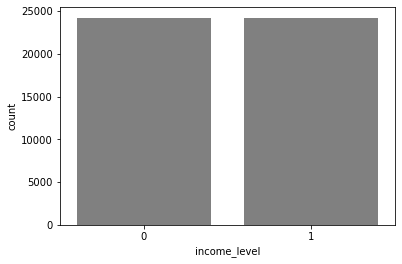

In [855]:
data_train2 = pd.concat([X_train3, y_train3], axis = 1)
sns.countplot(x="income_level", data=data_train2, color='gray')

In [856]:
#Diagnostyka modeli 

def print_scores(model, X_train, X_test):
    print(f"ZBIÓR TRENINGOWY:")
    print(f"Model score: {model.score(X_train, y_train)}")
    print(f"Precision score: {precision_score(y_train, model.predict(X_train), average='binary')}")
    print(f"roc_auc score: {roc_auc_score(y_train, model.predict(X_train))}")
    print("-------------------------------")
    print(f"ZBIÓR TESTOWY:")
    print(f"Model score: {model.score(X_test, y_test)}")
    print(f"Precision score: {precision_score(y_test, model.predict(X_test), average='binary')}")
    print(f"roc_auc score: {roc_auc_score(y_test, model.predict(X_test))}")
    
def show_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='g',cmap='Blues')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

In [857]:
#Interpretowalność

def feature_importance(model):
    features=pd.get_dummies(X_train)
    model.fit(features, y_train)
    feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
    plt.figure(figsize=(16, 12))
    plt.title("Feature importance")
    sns.barplot(x="feature_importance", y="features",
                data=feature_importances.sort_values('feature_importance',ascending=False), color = 'pink');
    
def shapley(model, X_train, X_val):

    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")    

#### Regresja Logistyczna

Na początek wykorzystamy regresję logistyczną. Wykorzystamy już wcześniej zdefiniowany model `lr`.

Regresja raczej do wyrzucenia 

In [858]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

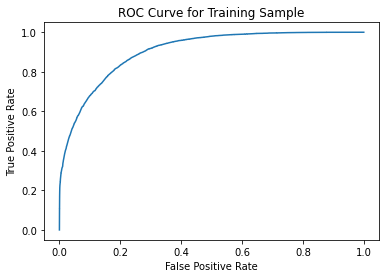

gini_test: 0.8088


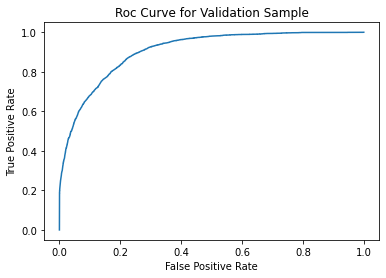

gini_val: 0.8115


In [859]:
gini_train_val(lr, X_train, y_train, X_test, y_test)

Zarówno acuracy score jak i wskaźnik gini dla podstawowego zbioru testowego są na wysokim poziomie. Teraz sprawdźmy predykcyjność dla zbioru pozbawionego zmiennych `sex` i `race`

In [860]:
lr.fit(X_train2, y_train)

LogisticRegression(max_iter=1000)

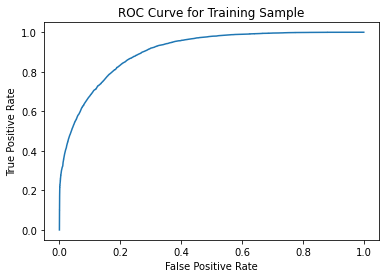

gini_test: 0.8086


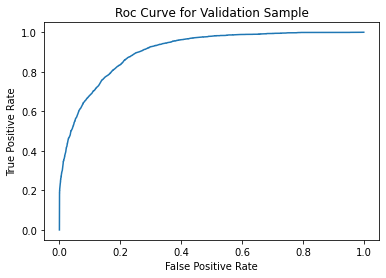

gini_val: 0.8122


In [861]:
gini_train_val(lr, X_train2, y_train, X_test2, y_test)

Wyniki są bardzo zbliżone do tych dla całego zbioru.

### Drzewo decyzyjne

In [862]:
Tree = DecisionTreeClassifier()
Tree.fit(X_trainc, y_trainc)

DecisionTreeClassifier()

In [863]:
Tree.score(X_trainc, y_trainc)

0.9308802980903587

In [864]:
Tree.score(X_testc, y_testc)

0.8233294764246456

#### Baseline

In [865]:
#Baseline
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
pred = Tree.predict(X_test)

In [866]:
print_scores(Tree, X_train, X_test)

ZBIÓR TRENINGOWY:
Model score: 0.8900481291724888
Precision score: 0.837501894800667
roc_auc score: 0.8234329814727119
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.8321845355899816
Precision score: 0.6777589134125637
roc_auc score: 0.7420873704005657


Z tym gini coś jest nie tak, powinno być 2*roc_auc - 1. 

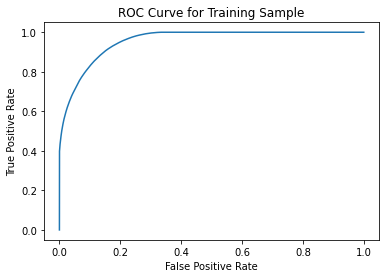

gini_test: 0.9127


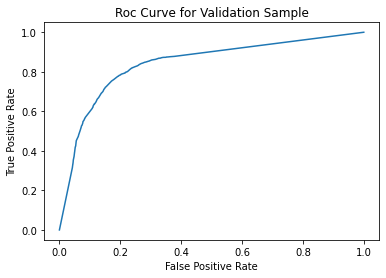

gini_val: 0.6813


In [867]:
gini_train_val(Tree, X_train, y_train, X_test, y_test)

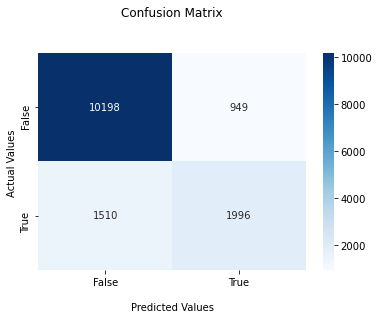

In [868]:
show_confusion_matrix(y_test, Tree.predict(X_test))

In [869]:
Tree.fit(X_train2, y_train)

DecisionTreeClassifier()

In [870]:
print_scores(Tree, X_train2, X_test2)

ZBIÓR TRENINGOWY:
Model score: 0.8795528644620401
Precision score: 0.8144581996026288
roc_auc score: 0.8082412357572669
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.8383948679451307
Precision score: 0.6918408631153068
roc_auc score: 0.7516436087137349


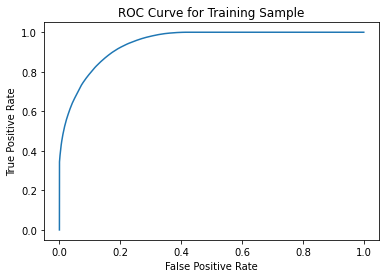

gini_test: 0.8913


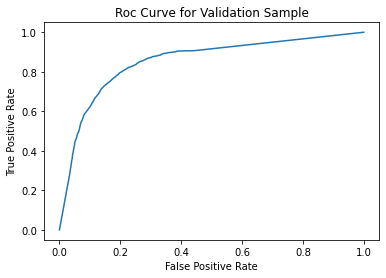

gini_val: 0.7063


In [871]:
gini_train_val(Tree, X_train2, y_train, X_test2, y_test)

Bazowy model drzewa decyzyjnego okazuje się przyzwoity. Metryki, które wybraliśmy do oceny modelu zdecydowanie można poprawić, zarówno dla zbioru treningowego i testowego. 

#### Strojenie parametrów

In [872]:
max_depth=[3, 4, 5, 6, 7, 8, 9, 10]
splitter = ["best", "random"]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05, 0.1, 0.02]
# min_samples_split=range(1,20)
# min_samples_leaf=[0.5, 1, 1.5, 2]
# max_features=["sqrt", "log2"]
param_grid = dict(max_depth=max_depth, splitter=splitter, criterion=criterion, ccp_alpha=ccp_alpha)
#                 ,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)

In [ ]:
# Tree = DecisionTreeClassifier()
# random = GridSearchCV(estimator=Tree, param_grid=param_grid, cv = 5, n_jobs=-1)

# grid_result = grid.fit(X_train, y_train)
# print(f"Best score: {grid_result.best_score_}")
# print(f"Best parameters: {grid_result.best_params_} ")
# best_tree = random_result.best_estimator_

In [874]:
Tree = DecisionTreeClassifier()
random = RandomizedSearchCV(estimator=Tree, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=100)

random_result = random.fit(X_train, y_train)
print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_} ")
best_tree = random_result.best_estimator_

Best score: 0.8455519329296693
Best parameters: {'splitter': 'random', 'max_depth': 8, 'criterion': 'gini', 'ccp_alpha': 0} 


In [875]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=8, splitter='random')

In [876]:
print_scores(best_tree, X_train, X_test)

ZBIÓR TRENINGOWY:
Model score: 0.8512963825492936
Precision score: 0.743134577454104
roc_auc score: 0.7713913197072022
-------------------------------
ZBIÓR TESTOWY:
Model score: 0.8443322186582952
Precision score: 0.7096884628551866
roc_auc score: 0.757598912443782


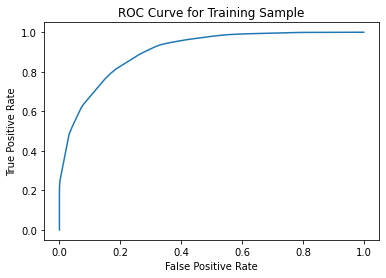

gini_test: 0.8076


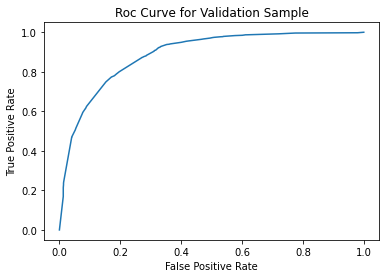

gini_val: 0.7758


In [877]:
gini_train_val(best_tree, X_train, y_train, X_test, y_test)

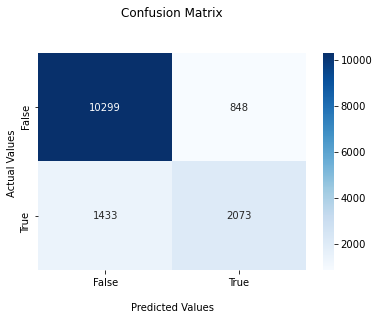

In [878]:
show_confusion_matrix(y_test, best_tree.predict(X_test))

Po dobraniu parametrów udało się poprawić wyniki na zbiorze testowym. Model jest teraz lepiej zrównoważony.

#### Interpretowalność

In [ ]:
feature_importance(best_tree)

In [ ]:
shapley(best_tree, X_train, X_test)

Najważniejsze dla predykcji zarobków w modelu drzewa decyzyjnego według feature importance okazują się zmienne `relationship`, `capital_gain` i `occupation`.

#### K-najbliższych sąsiadów - do wywalenia?

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

accuracy_score(y_test, knc.predict(X_test))

In [ ]:
gini_train_val(knc, X_train, y_train, X_test, y_test)

In [ ]:
knc.fit(X_train2, y_train)

accuracy_score(y_test, knc.predict(X_test2))

In [ ]:
gini_train_val(knc, X_train2, y_train, X_test2, y_test)

### Las losowy

#### Baseline

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
print_scores(rf, X_train, X_test)

In [ ]:
gini_train_val(rf, X_train, y_train, X_test, y_test)

In [ ]:
show_confusion_matrix(y_test, rf.predict(X_test))

In [ ]:
rf.fit(X_train2, y_train)

In [ ]:
print_scores(rf, X_train2, X_test2)

In [ ]:
gini_train_val(rf, X_train2, y_train, X_test2, y_test)

In [ ]:
show_confusion_matrix(y_test, rf.predict(X_test2))

Bazowy moel lasów losowych ma już dobre wyniki na starcie, lecz postaramy się je poprawić poprzez tuning hiperparametrów. 

#### Strojenie parametrów

In [ ]:
max_depth=[3, 4, 5]
n_estimators = [80, 90, 100, 110, 120]
criterion=["gini","entrophy"]
bootstrap = [True, False]
min_samples_split = [2, 5, 10, 20, 50]
param_grid = dict(max_depth=max_depth, n_estimators = n_estimators, criterion=criterion,
                  min_samples_split=min_samples_split, bootstrap = bootstrap)

In [ ]:
rf = RandomForestClassifier()
random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=110)

random_result = random.fit(X_train, y_train)
print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_} ")
best_rf = random_result.best_estimator_

In [ ]:
best_rf.fit(X_train, y_train)

In [ ]:
print_scores(best_rf, X_train, X_test)

In [ ]:
gini_train_val(best_rf, X_train, y_train, X_test, y_test)

In [ ]:
show_confusion_matrix(y_test, best_rf.predict(X_test))

Ponownie udało się polepszyć wyniki dla zbioru testowego.

#### Intepretowalność

In [ ]:
feature_importance(best_rf)

Ważność kolumn układa się dosyć podobnie w przypadku lasów losowych.

### AdaBoost

#### Baseline

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

In [ ]:
print_scores(abc, X_train, X_test)

In [ ]:
gini_train_val(abc, X_train, y_train, X_test, y_test)

In [ ]:
abc.fit(X_train2, y_train)

In [ ]:
print_scores(abc, X_train2, X_test2)

In [ ]:
gini_train_val(abc, X_train2, y_train, X_test2, y_test)

In [ ]:
show_confusion_matrix(y_test, abc.predict(X_test2))

AdaBoost nawet bez doboru parametrów ma bardzo dobre wartości metryk, najlepsze do tej pory. Wszytskie parametry są wysokie a jednocześnie zrównoważone dla zbioru testowego i treninngowego. Nie zatrzyma to nas jednak przez strojeniem parametrów BUAHAHAHA

In [ ]:
n_estimators = range(40, 100, 5)
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(n_estimators = n_estimators, learning_rate = learning_rate)

In [ ]:
abc = AdaBoostClassifier()
random = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=110)

random_result = random.fit(X_train, y_train)
print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_} ")
best_abc = random_result.best_estimator_

In [ ]:
best_abc.fit(X_train, y_train)

In [ ]:
print_scores(best_abc, X_train, X_test)

In [ ]:
gini_train_val(best_abc, X_train, y_train, X_test, y_test)

Dobór parametrów delikatnie pogorszył wyniki. Dlatego lepiej zostać przy bazowym modelu.

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

#### Intepretowalność

In [ ]:
feature_importance(abc)

Feature Importance w przypadku AdaBoost rozłożył się bardziej równomiernie. Tym razem najważniejszymi predyktorami są `education_num`, `age`, `occupation`.

#### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
gini_train_val(gb, X_train, y_train, X_test, y_test)

In [ ]:
gb.fit(X_train2, y_train)
accuracy_score(y_test, gb.predict(X_test2))

In [ ]:
gini_train_val(gb, X_train2, y_train, X_test2, y_test)

Sprawdźmy najpierw, który model zostanie wybrany jako najlepszy przez `TPOTClassifier`.

![xd.jpg](attachment:xd.jpg)

Zastosowanie TPOT wskazało, że najlepiej użyć klasyfikatora XGBoost z następującymi parametrami: learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0

### XGBoost

#### baseline

In [ ]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, y_train)

In [ ]:
print_scores(xgb, X_train, X_test)

In [ ]:
gini_train_val(xgb, X_train, y_train, X_test, y_test)

In [ ]:
show_confusion_matrix(y_test, xgb.predict(X_test))

In [ ]:
xgb.fit(X_train2, y_train)

In [ ]:
print_scores(xgb, X_train2, X_test2)

In [ ]:
gini_train_val(xgb, X_train2, y_train, X_test2, y_test)

In [ ]:
show_confusion_matrix(y_test, xgb.predict(X_test2))

#### strojenie parametrów

In [ ]:
learning_rate=[0.05, 0.1, 0.15, 0.2] 
max_depth=[3,4,5,6,7,8,9,10]
min_child_weight=[2,3,4,5,7,10,150] 
n_estimators=range(80, 120, 5) 
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth,
                  min_child_weight=min_child_weight, n_estimators=n_estimators)

In [ ]:
xgb = XGBClassifier()
random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=110)

random_result = random.fit(X_train, y_train)
print(f"Best score: {random_result.best_score_}")
print(f"Best parameters: {random_result.best_params_} ")
best_xgb = random_result.best_estimator_

In [ ]:
best_xgb.fit(X_train, y_train)

In [ ]:
print_scores(best_xgb, X_train, X_test)

In [ ]:
gini_train_val(best_xgb, X_train, y_train, X_test, y_test)

In [ ]:
show_confusion_matrix(y_test, best_xgb.predict(X_test))

Po tuningu wyniki dla xgb nieróżnią się wiele, gini się zrównoważyło, ale ogólnie nie jest oczywistym stwierdzenie, że tuning pomógł.

#### feature importance

In [ ]:
feature_importance(best_xgb)

In [ ]:
Jak jest każdy widzi.

In [ ]:
#do zapisywania wymagan
#pip freeze > requirements.txt